In [2]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import gridspec
from matplotlib import rcParams
from scipy.optimize import curve_fit
import scipy.stats as stats
from matplotlib import lines
import seaborn as sns
plt.rcParams['pdf.fonttype'] = 42 # to be able to change text in pdf opened with illustrator
plt.rcParams['ps.fonttype'] = 42
#import scipy.stats as stats
from statsmodels.stats import multicomp 
from scipy import stats
import dabest

import pandas as pd
import glob

import tkinter as tk
from tkinter import filedialog#to open dialog box to choose file
from tkinter.filedialog import askopenfilename

/Users/wormsenselab/anaconda3/envs/dabest/lib/python3.7/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/Users/Fechner/.matplotlib/matplotlibrc", line #3
  (fname, cnt))
/Users/wormsenselab/anaconda3/envs/dabest/lib/python3.7/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/Users/Fechner/.matplotlib/matplotlibrc", line #4
  (fname, cnt))


In [3]:
# Add heka_reader to PYTHONPATH
import sys
fpath = '/Users/Fechner/PythonStuff/heka_reader'
sys.path.append(fpath)

### switch to my directory and check if I am in the correct directory

In [4]:
cd ~/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/DrugResponse2019-30uM


/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/DrugResponse2019-30uM


In [5]:
pwd

'/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/DrugResponse2019-30uM'

### create a shortcut for my file directory where to save and the filename of the RATIO/DELTA data

## Ratio plots are a result of the Matlab script TEVCAnalyzeLoopSTFX.m found on github analyzing mean values of 3 recordings for several conditions 

https://github.com/sfechner/AnalysisFunction/tree/master/TEVC

In [6]:
filedir ='/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/DrugResponse2019-30uM/'
filedirManuscript ='/Users/Fechner/Dropbox/ManuscriptFechnerPharmacology/Figures/ExportedFromNotebook/'
filedirManuscriptStat ='/Users/Fechner/Dropbox/ManuscriptFechnerPharmacology/Statistics/'

#CHANGE USER NAME ON PRIVATE LAPTOP TO Fechner or be more clever about the Filename

#root = tk.Tk()
#root.withdraw() not sure if necessary, description to avoid opening full gui

#either choose a cetain file or open dialog box
#certain file
filename = 'AllRatioDrug-20200330.xlsx'
#'AllRatioDrug-20200330.xlsx'
#open dialog box
#filename = filedialog.askopenfilename() #creates filename and directory. TODO: write conditional sentence
#root.update() # necessary in Mac(?) to close the dialog box



# ToDO

- Analysis (Drug response)
    - re-analyze the data from Isabel, because Matlab script was changed
- DataSlicing
    - how to reorder according to a list input 
   
- plotting: 
    - how to make plot similar size. never end up exactly the same with holgers script
    - how to plot several plots on the same plit
    

In [7]:
#pandas environment
print(filename)
xl = pd.ExcelFile(filedir+filename)
xl.sheet_names

df = xl.parse("Sheet1",converters={'CultivationSol': str,'RATIO':str,'VrevSTART':str}) #calls for Sheet names ,'RATIO': np.int64}

df['RATIO'] = pd.to_numeric(df['RATIO'], errors='coerce')
df['VrevSTART'] = pd.to_numeric(df['VrevSTART'], errors='coerce')

df.head()

print(df['RATIO'])


AllRatioDrug-20200330.xlsx
0        1.033787
1        1.397592
2        1.006062
3        1.027657
4        1.082456
5        1.100123
6        1.260092
7        1.176013
8        1.147461
9        1.437354
10       1.173107
11       1.393110
12       2.148813
13       1.064669
14       1.371188
15       0.707641
16       1.560379
17       1.182957
18       1.167505
19       1.162672
20       1.209578
21       0.430102
22       1.165151
23       1.134414
24       1.146924
25       0.975063
26       1.053971
27       1.033856
28       0.849882
29       1.161686
          ...    
4242     1.060418
4243     1.192081
4244     1.583220
4245     1.187767
4246     1.066805
4247     1.428136
4248     1.991363
4249     1.798107
4250    -0.214631
4251     1.048099
4252     0.952697
4253     1.086443
4254     0.962278
4255     0.818423
4256     0.752474
4257     0.973576
4258     0.863233
4259     1.066522
4260     0.925522
4261     1.974177
4262     0.859437
4263     0.869210
4264     0.994250
4

In [8]:
# for elements in len(df["RATIO"]):
# float(df["RATIO"][1])    

# Control/Inspection
- check if there is a mistake in how I wrote the Inspection mix (if there are doubles)
- same for the TestSol

df.pivot(columns='Injection', values='DELTA').describe().T #check data for which Injections have been used

df.pivot(columns='TestSol', values='DELTA').describe().T  #check if I was consistent with labeling solutions

# color/hardcoded

In [9]:
colors = ["red","blue",(0.30, 0.69, 0.29),(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00),"darkgreen",(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.6, 0.31, 0.64)]
colorsSINGLES = [(0.30, 0.69, 0.29),(0.60, 0.31,0.64),(0.89, 0.11,0.10),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00),"darkgreen",(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.6, 0.31, 0.64)]
colorsPharma = [(0.30, 0.69, 0.29),(0.60, 0.31,0.64),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00),"darkgreen",(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.6, 0.31, 0.64)]
colorsEST = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.30, 0.69, 0.29),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00)]
colorsESTAll = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00),(0.30, 0.69, 0.29),(1, 0.50,0),(0.22,0.49,0.72)]

# common axis parameters for graph

In [10]:
AxisTickLabelSize = 8
AxisLabelSize = 10
AxisLegendSize = 8
SizeOfMarker = 3
ErrorColor = 'red'

### Figure 1
MeanSTART Values of StartSol NaGlu1 with different single subunit Injections

Vrev Values of StartSol NaGlu1 with different single subunit Injections

# Re-arrange ALL data for Estimation plot according to MeanSTART and MeanTEST

# Re-arrange ALL data for Estimation plot according to Vrev Start and  Vrev Test


In [11]:
AllInjection =  pd.unique(df["Injection"])
#AllInjection =  ['uninjected']
AllInjection = AllInjection.tolist()
print(AllInjection)

StartSolution = pd.unique(df["StartSol"])
StartSolution  = StartSolution.tolist()

df_newVrev = pd.DataFrame()
df_newVrevInmV =pd.DataFrame()
results = {}

for Solelement in StartSolution: 
    for element in AllInjection:
        if df[(df.Injection.isin([element])) & (df.StartSol.isin([Solelement]))].empty == True:
            #print('sdsdsd')
            continue
        else: 
            #print('sol presetn')
            result = df[(df.Injection.isin([element])) & (df.StartSol.isin([Solelement]))]
            results[element] = result
            if len(results[element]) <= 2:
#                 print(results[element]["TestSol"] + '+' + results[element]["Injection"] + ' has less or equal to 2 recordings')
                continue
            else:
                df_newVrev = pd.concat([df_newVrev,results[element]["VrevSTART"].rename(element+"-"+Solelement)],sort=False, axis=1)
            #print(len(results[element]))
        
df_newVrevInmV = df_newVrev.astype(float)
#
#print(df_newVrevInmV['mg419mg012-NaGlu1'])
#print(df_newVrevInmV.head())





['mg012', 'mg410mg012', 'mg410mg428mg012', 'mg410mg428mg427mg012', 'mg418', 'mg418mg012', 'mg418mg012mg512', 'mg419', 'mg419mg012', 'mg419mg012mg418', 'mg419mg012mg418mg512', 'mg419mg012mg512', 'mg427mg012', 'mg428mg012', 'mg512mg012', 'mg691', 'mg693', 'mg751mg012', 'mg757mg012', 'mg758mg012', 'pTL69mg012', 'pTL69pTL70mg512mg012', 'pTL70mg012', 'uninjected']


In [12]:
#df_newVrevInmV.columns.values
#df_newVrevInmV
#display(list(df_newVrevInmV.columns.values) )


# check type of data


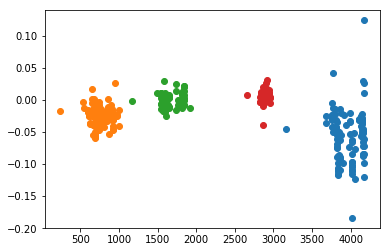

In [13]:
plt.plot(df_newVrevInmV['uninjected-NaGlu1'],'o')
plt.plot(df_newVrevInmV['mg418mg012-NaGlu1'],'o')
plt.plot(df_newVrevInmV['mg419mg012-NaGlu1'],'o')
plt.plot(df_newVrevInmV['pTL69mg012-NaGlu1'],'o')
plt.show()

In [14]:
shared_controlVrevTalk = dabest.load(df_newVrevInmV, idx=("uninjected-NaGlu1","mg418mg012-NaGlu1"))
shared_controlVrevTalk


DABEST v0.2.4
             
Good afternoon!
The current time is Thu Dec 17 13:35:06 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. mg418mg012-NaGlu1 minus uninjected-NaGlu1

5000 resamples will be used to generate the effect size bootstraps.

In [15]:
#shared_controlVrevTalk.mean_diff()

In [16]:
colorsESTTalk = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.30, 0.69, 0.29),(1, 0.50,0),(0.22,0.49,0.72)]

In [17]:
# #change figure!!!!
# #fig1 = plt.figure(figsize=(3.5, 3)) 
# #ax1 = plt.subplot(1,1,1)
# #
# plt.figure(figsize=(2.8, 5)) 
# #fig_size=(4, 5.5)
# fig1= shared_controlVrevTalk.mean_diff.plot(swarm_ylim=(-100,50), contrast_ylim=(-60,60), custom_palette=colorsESTTalk,fig_size=(3,5),
#                                      raw_marker_size=(2),es_marker_size=2,contrast_label= 'ΔV$_{rev}$ (mV)',
#                                     swarm_label='reversal potential, V$_{rev}$ (mV)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
#                                    'color':'red'})#,reflines_kwargs


# fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linestyle='--',linewidth=0.5)
# #fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
# fig1.axes[0].tick_params(axis='both', which='major', labelsize=AxisLegendSize)  
# fig1.axes[1].tick_params(axis='both', which='major', labelsize=AxisLegendSize)  
# #fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
# #ax1.spines['left'].set_position(('outward',35))
# fig1.axes[0].get_yaxis().set_tick_params(direction='in')
# fig1.axes[1].get_yaxis().set_tick_params(direction='in')
# fig1.axes[0].get_xaxis().set_tick_params(direction='in')
# fig1.axes[1].get_xaxis().set_tick_params(direction='in')

# labels = ['Uninj','DEGT-1d', 'UNC-8d', 'DEL-1d', 'MEC-10d','MEC-4d']
# fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right',fontsize=AxisLegendSize)
# labels2 = ['','DEGT-1d', 'UNC-8d', 'DEL-1d', 'MEC-10d','MEC-4d']
# fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right',fontsize=AxisLegendSize)

# plt.gcf().subplots_adjust(bottom=0.1, left=0.25,right=None, top=None,hspace=2, wspace=0.2) 
# plt.savefig(filedir+"Fig1-EstStat-NaGlu-MeanVrev"+'.pdf')
# #plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
# plt.savefig(filedirManuscript+"Fig1-EstStat-NaGlu-MeanVrevTalk"+'.pdf')




## DELTA NaGlu1 single subunits

 separate data from individual injection groups for the first solution recorden = NaGlu1 into separate variables as "Initial current"

In [18]:
filedir

'/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/DrugResponse2019-30uM/'

In [19]:
#Initial Current for statistics
IniCurmg419 = df[(df.Injection.isin(["mg419mg012"])) & (df.StartSol.isin(["NaGlu1"]))]
IniCurpTL69 = df[(df.Injection.isin(["pTL69mg012"])) & (df.StartSol.isin(["NaGlu1"]))]
IniCurmg418 = df[(df.Injection.isin(["mg418mg012"])) & (df.StartSol.isin(["NaGlu1"]))]
IniCurmgmg512 = df[(df.Injection.isin(["mg512mg012"])) & (df.StartSol.isin(["NaGlu1"]))]
IniCurmgmgpTL70 = df[(df.Injection.isin(["pTL70mg012"])) & (df.StartSol.isin(["NaGlu1"]))]
IniCurmgUninj = df[(df.Injection.isin(["uninjected"])) & (df.StartSol.isin(["NaGlu1"]))]
IniCurmg012only = df[(df.Injection.isin(["mg012"])) & (df.StartSol.isin(["NaGlu1"]))]
IniCurmg418only = df[(df.Injection.isin(["mg418"])) & (df.StartSol.isin(["NaGlu1"]))]

IniCurmg419.to_csv(filedir+'IniCurmg419.csv', header=True, index=None, sep=',', mode='w')
IniCurpTL69.to_csv(filedir+'IniCurpTL69.csv', header=True, index=None, sep=',', mode='w')
IniCurmg418.to_csv(filedir+'IniCurmg418.csv', header=True, index=None, sep=',', mode='w')
IniCurmgmg512.to_csv(filedir+'IniCurmgmg512.csv', header=True, index=None, sep=',', mode='w')
IniCurmgmgpTL70.to_csv(filedir+'IniCurmgmgpTL70.csv', header=True, index=None, sep=',', mode='w')
IniCurmgUninj.to_csv(filedir+'IniCurmgUninj.csv', header=True, index=None, sep=',', mode='w')

#copy to MAnuscrit folder
IniCurmg419.to_csv(filedirManuscriptStat+'Initial-Current-MEC4d.csv', header=True, index=None, sep=',', mode='w')
IniCurpTL69.to_csv(filedirManuscriptStat+'Initial-Current-UNC8d.csv', header=True, index=None, sep=',', mode='w')
IniCurmg418.to_csv(filedirManuscriptStat+'Initial-Current-DEGT1d.csv', header=True, index=None, sep=',', mode='w')
IniCurmgmg512.to_csv(filedirManuscriptStat+'Initial-Current-MEC10d.csv', header=True, index=None, sep=',', mode='w')
IniCurmgmgpTL70.to_csv(filedirManuscriptStat+'Initial-Current-DEL1d.csv', header=True, index=None, sep=',', mode='w')
IniCurmgUninj.to_csv(filedirManuscriptStat+'Initial-Current-uninjected.csv', header=True, index=None, sep=',', mode='w')



In [20]:
###  control to get quick count of cells etc... 

IniCurmg418only.pivot(columns='Injection', values='DELTA').describe().T

,count,mean,std,min,25%,50%,75%,max
Injection,,,,,,,,
mg418,15.0,2.845738e-08,4.908766e-08,-2.554029e-08,-4.178972e-09,1.359890e-08,4.429406e-08,1.471085e-07


## plot for Initial current of individual injections. This version of plot is not in the manuscript

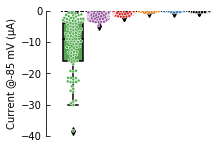

In [21]:
#Plot1
fig = plt.figure(figsize=(3.5, 3)) 
ax1 = plt.subplot(1,1,1)

InitialCurrent = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","mg512mg012","pTL70mg012","uninjected","mg418","mg012"])) & (df.StartSol.isin(["NaGlu1"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!

InitialCurrent.to_csv(filedir+'InitialCurrent.csv', header=True, sep=',', mode='a')
InitialCurrent.to_csv(filedirManuscriptStat+'InitialCurrent.csv', header=True, index=None, sep=',', mode='w')


#plot 300 uM
#,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30", "NaGluPhen30", "NaGluBzd30","NaGluDiclo30", "NaGluIbu30","NaGluGMQ30"]

#plot 30 uM Amil
#sns.swarmplot(x = InitialCurrent['Injection'], y = InitialCurrent['MeanSTART']*1000000 , data = InitialCurrent,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax1, order=np.unique(InitialCurrent['Injection']))
sns.swarmplot(x = InitialCurrent['Injection'], y = InitialCurrent['MeanSTART']*1000000 , data = InitialCurrent,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, size = 3,ax=ax1, order=["mg419mg012","pTL69mg012","mg418mg012","mg512mg012","pTL70mg012","uninjected"])
sns.boxplot(x = InitialCurrent['Injection'], y = InitialCurrent['MeanSTART']*1000000 , data = InitialCurrent, palette=sns.color_palette(colorsSINGLES),ax=ax1,order=["mg419mg012","pTL69mg012","mg418mg012","mg512mg012","pTL70mg012","uninjected"])
##### AXIS 1 ####
#ax1.set_ylim([-50, 1])
ax1.set_ylim([-40, 0.1])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=10)  
#ax1.set_title('bla',size=18)
ax1.set_xticklabels(["mg419mg012","pTL69mg012","mg418mg012","mg512mg012","pTL70mg012","uninjected"],rotation=30)
ax1.spines['bottom'].set_visible(False) 
ax1.xaxis.set_visible(False)

plt.ylabel('Current @-85 mV (µA)', fontsize=AxisLabelSize) 
plt.xlabel('DEG/ENaC/ASIC subunits', fontsize=AxisLabelSize)
plt.gcf().subplots_adjust(bottom=0.3, left=0.3)
plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig1-NaGlu-MeanStart"+'.pdf')
plt.show()

In [22]:
df.head()

,CellIDRec,Injection,CultivationSol,DaysPostInj,Rating,StartSol,TestSol,MeanSTART,MeanTEST,DELTA,RATIO,VrevSTART,VrevTEST,DELTAVrev,copyCELL,RestingVM
0,STFX103004,mg012,L-15(300Amil),4,2.5,NaGluAmil300,NaGlu2,-2.122042e-07,-2.193738e-07,-7.169659e-09,1.033787,-0.042497,-0.041392,0.001106,STFX103004,-5.4
1,STFX104027,mg012,L-15(300Amil),6,2.0,NaGluAmil300,NaGlu2,-1.870089e-07,-2.613622e-07,-7.435325e-08,1.397592,-0.045129,-0.035311,0.009818,STFX104027,-5.4
2,STFX103022,mg012,L-15(300Amil),5,3.0,NaGluAmil300,NaGlu2,-1.819118e-07,-1.830145e-07,-1.102670e-09,1.006062,-0.047429,-0.048975,-0.001546,STFX103022,-5.4
3,STFX103035,mg012,L-15(300Amil),6,3.0,NaGluAmil300,NaGlu2,-1.354247e-07,-1.391701e-07,-3.745396e-09,1.027657,-0.062758,-0.062891,-0.000133,STFX103035,-7.7
4,STFX103040,mg012,L-15(300Amil),6,2.0,NaGluAmil300,NaGlu2,-1.041255e-07,-1.127112e-07,-8.585737e-09,1.082456,-0.034900,-0.033720,0.001180,STFX103040,-5.4


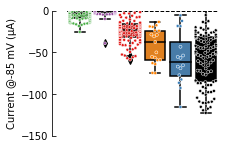

In [23]:
#Plot1
fig = plt.figure(figsize=(3.5, 3)) 
ax1 = plt.subplot(1,1,1)

InitialCurrent = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","mg512mg012","pTL70mg012","uninjected","mg418","mg012"])) & (df.StartSol.isin(["NaGlu1"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!

InitialCurrent.to_csv(filedir+'InitialCurrent.csv', header=True, sep=',', mode='a')
InitialCurrent.to_csv(filedirManuscriptStat+'InitialCurrent.csv', header=True, index=None, sep=',', mode='w')


#plot 300 uM
#,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30", "NaGluPhen30", "NaGluBzd30","NaGluDiclo30", "NaGluIbu30","NaGluGMQ30"]

#plot 30 uM Amil
#sns.swarmplot(x = InitialCurrent['Injection'], y = InitialCurrent['MeanSTART']*1000000 , data = InitialCurrent,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax1, order=np.unique(InitialCurrent['Injection']))
sns.swarmplot(x = InitialCurrent['Injection'], y = InitialCurrent['VrevSTART']*1000 , data = InitialCurrent,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, size = 3,ax=ax1, order=["mg419mg012","pTL69mg012","mg418mg012","mg512mg012","pTL70mg012","uninjected"])
sns.boxplot(x = InitialCurrent['Injection'], y = InitialCurrent['VrevSTART']*1000 , data = InitialCurrent, palette=sns.color_palette(colorsSINGLES),ax=ax1,order=["mg419mg012","pTL69mg012","mg418mg012","mg512mg012","pTL70mg012","uninjected"])
##### AXIS 1 ####
#ax1.set_ylim([-50, 1])
ax1.set_ylim([-150, 0.1])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=10)  
#ax1.set_title('bla',size=18)
ax1.set_xticklabels(["mg419mg012","pTL69mg012","mg418mg012","mg512mg012","pTL70mg012","uninjected"],rotation=30)
ax1.spines['bottom'].set_visible(False) 
ax1.xaxis.set_visible(False)

plt.ylabel('Current @-85 mV (µA)', fontsize=AxisLabelSize) 
plt.xlabel('DEG/ENaC/ASIC subunits', fontsize=AxisLabelSize)
plt.gcf().subplots_adjust(bottom=0.3, left=0.3)
plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig1-NaGlu-Vrev"+'.pdf')
plt.show()

## plotting initial current data with as estimation statistics plot

In [24]:
Img419Naglu = InitialCurrent.loc[InitialCurrent['Injection'] == 'mg419mg012',['MeanSTART']] #returns a data frame 
Img419Naglu.columns = ['M4d']
Img418Naglu = InitialCurrent.loc[InitialCurrent['Injection'] == 'mg418mg012',['MeanSTART']] #returns a data frame 
Img418Naglu.columns = ['DT1d']
IpTL69Naglu = InitialCurrent.loc[InitialCurrent['Injection'] == 'pTL69mg012',['MeanSTART']] #returns a data frame 
IpTL69Naglu.columns = ['U8d']
IuninjNaglu = InitialCurrent.loc[InitialCurrent['Injection'] == 'uninjected',['MeanSTART']] #returns a data frame 
IuninjNaglu.columns = ['Uninj']
Img512Naglu = InitialCurrent.loc[InitialCurrent['Injection'] == 'mg512mg012',['MeanSTART']] #returns a data frame 
Img512Naglu.columns = ['M10d']
IpTL70Naglu = InitialCurrent.loc[InitialCurrent['Injection'] == 'pTL70mg012',['MeanSTART']] #returns a data frame 
IpTL70Naglu.columns = ['Del1d']
Img418AloneNaglu = InitialCurrent.loc[InitialCurrent['Injection'] == 'mg418',['MeanSTART']] #returns a data frame 
Img418AloneNaglu.columns = ['DEGT1alone']
Img012AloneNaglu = InitialCurrent.loc[InitialCurrent['Injection'] == 'mg012',['MeanSTART']] #returns a data frame 
Img012AloneNaglu.columns = ['M2alone']

In [25]:

#plt.show()

In [26]:
IuninjNaglu

,Uninj
3158,-1.792342e-07
3582,-3.970221e-08
3679,-2.379636e-07
3683,-1.640000e-07
3696,-4.615499e-08
3705,-2.536767e-08
3707,-2.114284e-08
3711,-9.479853e-09
3712,-1.996223e-09
3742,-2.066367e-08


### concatenate data for estimations stats plot

### comment: ERRORS in the dispplay of the estimation plot if fata are concatenated that are not used in the graph!!! make concatenation for each plot

In [27]:
#concatenateData
INagluConcat = pd.concat([IuninjNaglu.reset_index(drop=True),
                          Img418Naglu.reset_index(drop=True),
                          Img419Naglu.reset_index(drop=True),
                          IpTL69Naglu.reset_index(drop=True),
                          Img512Naglu.reset_index(drop=True),
                          IpTL70Naglu.reset_index(drop=True)],sort=False, axis=1)
#                           Img418AloneNaglu.reset_index(drop=True),
#                           Img012AloneNaglu.reset_index(drop=True)] #sort=False removed the warning, but no idea what its doing
INagluConcatuA = INagluConcat *1000000
INagluConcatDEGT1 = pd.concat([IuninjNaglu.reset_index(drop=True),Img418Naglu.reset_index(drop=True)],sort=False, axis=1) #sort=False removed the warning, but no idea what its doing
INagluConcatuADEGT1 = INagluConcatDEGT1 *1000000

In [28]:
#load Data
shared_control = dabest.load(INagluConcatuA, idx=("Uninj","DT1d","U8d","Del1d", "M10d","M4d"))#,"DEGT1alone","M2alone"
shared_control

shared_controlDEGT1 = dabest.load(INagluConcatuADEGT1, idx=("Uninj","DT1d"))
shared_controlDEGT1

DABEST v0.2.4
             
Good afternoon!
The current time is Thu Dec 17 13:35:09 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. DT1d minus Uninj

5000 resamples will be used to generate the effect size bootstraps.

### Statistics for estimation plot for Initial current Figure 1

In [29]:
shared_control.mean_diff

DABEST v0.2.4
             
Good afternoon!
The current time is Thu Dec 17 13:35:11 2020.

The unpaired mean difference between Uninj and DT1d is -0.478 [95%CI -0.555, -0.411].
The two-sided p-value of the Mann-Whitney test is 1.51e-35.

The unpaired mean difference between Uninj and U8d is -1.58 [95%CI -1.87, -1.34].
The two-sided p-value of the Mann-Whitney test is 2.26e-28.

The unpaired mean difference between Uninj and Del1d is -0.061 [95%CI -0.159, 0.00631].
The two-sided p-value of the Mann-Whitney test is 0.101.

The unpaired mean difference between Uninj and M10d is -0.098 [95%CI -0.185, -0.0353].
The two-sided p-value of the Mann-Whitney test is 0.00146.

The unpaired mean difference between Uninj and M4d is -10.9 [95%CI -12.6, -9.31].
The two-sided p-value of the Mann-Whitney test is 2.99e-41.

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the nul

In [30]:
shared_control

DABEST v0.2.4
             
Good afternoon!
The current time is Thu Dec 17 13:35:11 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. DT1d minus Uninj
2. U8d minus Uninj
3. Del1d minus Uninj
4. M10d minus Uninj
5. M4d minus Uninj

5000 resamples will be used to generate the effect size bootstraps.

### TODO: How to break the lines on y axis below ?

# KEEP

## Figure 1 estimation plot Initial current: Fig1-EstStat-NaGlu-MeanStart.pdf

<Figure size 201.6x360 with 0 Axes>

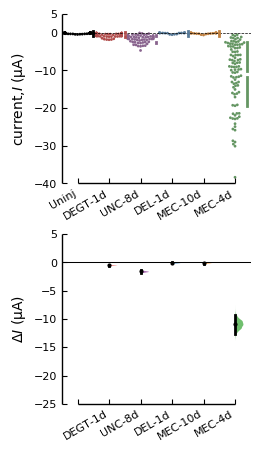

In [31]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
plt.figure(figsize=(2.8, 5)) 
fig1= shared_control.mean_diff.plot(swarm_ylim=(-40,5), contrast_ylim=(-25,5), custom_palette=colorsESTAll,fig_size=(3, 5),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='Δ$\it{I}$ (µA)',
                                    swarm_label='current,$\it{I}$ (µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))  



fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linestyle='--',linewidth=0.5)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=AxisLegendSize)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=AxisLegendSize)  
fig1.axes[0].get_yaxis().set_tick_params(direction='in')
fig1.axes[1].get_yaxis().set_tick_params(direction='in')
fig1.axes[0].get_xaxis().set_tick_params(direction='in')
fig1.axes[1].get_xaxis().set_tick_params(direction='in')
#ax1.spines['left'].set_position(('outward',35))
fig1.axes[0].set_yticks([5,0,-10,-20,-30,-40])

labels = ['Uninj','DEGT-1d', 'UNC-8d', 'DEL-1d', 'MEC-10d','MEC-4d']
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right',fontsize=AxisLegendSize)
labels2 = ['','DEGT-1d', 'UNC-8d', 'DEL-1d', 'MEC-10d','MEC-4d']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right',fontsize=AxisLegendSize)

plt.gcf().subplots_adjust(bottom=0.1, left=0.27,right=None, top=None,hspace=0.75, wspace=0.2) 

plt.savefig(filedir+"Fig1-EstStat-NaGlu-MeanStart"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig1-EstStat-NaGlu-MeanStart"+'.pdf')




### Initial Current Vrev estimated statistics?

In [32]:
Vmg419Naglu = InitialCurrent.loc[InitialCurrent['Injection'] == 'mg419mg012',['VrevSTART']] #returns a data frame 
Vmg419Naglu.columns = ['M4d']
Vmg418Naglu = InitialCurrent.loc[InitialCurrent['Injection'] == 'mg418mg012',['VrevSTART']] #returns a data frame 
Vmg418Naglu.columns = ['DT1d']
VpTL69Naglu = InitialCurrent.loc[InitialCurrent['Injection'] == 'pTL69mg012',['VrevSTART']] #returns a data frame 
VpTL69Naglu.columns = ['U8d']
VuninjNaglu = InitialCurrent.loc[InitialCurrent['Injection'] == 'uninjected',['VrevSTART']] #returns a data frame 
VuninjNaglu.columns = ['Uninj']
VuninjNaglu = VuninjNaglu.sort_values(by=['Uninj'])
Vmg512Naglu = InitialCurrent.loc[InitialCurrent['Injection'] == 'mg512mg012',['VrevSTART']] #returns a data frame 
Vmg512Naglu.columns = ['M10d']
VpTL70Naglu = InitialCurrent.loc[InitialCurrent['Injection'] == 'pTL70mg012',['VrevSTART']] #returns a data frame 
VpTL70Naglu.columns = ['Del1d']
Vmg418aloneNaglu = InitialCurrent.loc[InitialCurrent['Injection'] == 'mg418',['VrevSTART']] #returns a data frame 
Vmg418aloneNaglu.columns = ['DT1alone']
Vmg012aloneNaglu = InitialCurrent.loc[InitialCurrent['Injection'] == 'mg012',['VrevSTART']] #returns a data frame 
Vmg012aloneNaglu.columns = ['M2alone']


VuninjNaglu.to_csv(filedirManuscript+'VuninjNaglu.csv', header=True, sep=',', mode='w')


In [33]:
#concatenateData
VNagluConcat = pd.concat([VuninjNaglu.reset_index(drop=True),
                          Vmg418Naglu.reset_index(drop=True),
                          Vmg419Naglu.reset_index(drop=True),
                          VpTL69Naglu.reset_index(drop=True),
                          Vmg512Naglu.reset_index(drop=True),
                          VpTL70Naglu.reset_index(drop=True)],sort=True, axis=1)
#                           Vmg418aloneNaglu.reset_index(drop=True),
#                           Vmg012aloneNaglu.reset_index(drop=True) #sort=False removed the warning, but no idea what its doing
VNagluConcatuA = VNagluConcat *1000
# VNagluConcat = pd.concat([VuninjNaglu.reset_index(drop=True)],sort=False, axis=1) #sort=False removed the warning, but no idea what its doing
# VNagluConcatuA = VNagluConcat *1000


VNagluConcatDEGT1 = pd.concat([VuninjNaglu.reset_index(drop=True),Vmg418Naglu.reset_index(drop=True)],sort=False, axis=1) #sort=False removed the warning, but no idea what its doing
VNagluConcatuADEGT1 = VNagluConcatDEGT1 *1000

In [34]:
#load Data
shared_controlVrev = dabest.load(VNagluConcatuA, idx=("Uninj","DT1d","U8d","Del1d", "M10d","M4d"))#,"DT1alone", "M2alone"
shared_controlVrev
shared_controlVrevDEGT1 = dabest.load(VNagluConcatuADEGT1, idx=("Uninj","DT1d"))
shared_controlVrevDEGT1

DABEST v0.2.4
             
Good afternoon!
The current time is Thu Dec 17 13:35:13 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. DT1d minus Uninj

5000 resamples will be used to generate the effect size bootstraps.

In [35]:
shared_controlVrev.mean_diff

DABEST v0.2.4
             
Good afternoon!
The current time is Thu Dec 17 13:35:14 2020.

The unpaired mean difference between Uninj and DT1d is 30.8 [95%CI 22.3, 38.3].
The two-sided p-value of the Mann-Whitney test is 3.5e-15.

The unpaired mean difference between Uninj and U8d is 58.5 [95%CI 50.0, 66.5].
The two-sided p-value of the Mann-Whitney test is 1.09e-21.

The unpaired mean difference between Uninj and Del1d is -2.72 [95%CI -20.4, 13.6].
The two-sided p-value of the Mann-Whitney test is 0.784.

The unpaired mean difference between Uninj and M10d is 12.7 [95%CI -0.0546, 23.6].
The two-sided p-value of the Mann-Whitney test is 0.0798.

The unpaired mean difference between Uninj and M4d is 53.1 [95%CI 45.2, 61.0].
The two-sided p-value of the Mann-Whitney test is 3.71e-28.

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero di

<Figure size 201.6x360 with 0 Axes>

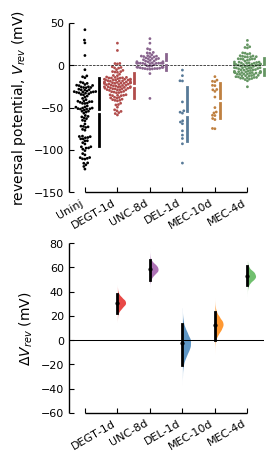

In [36]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
#
plt.figure(figsize=(2.8, 5)) 
#fig_size=(4, 5.5)
fig1= shared_controlVrev.mean_diff.plot(swarm_ylim=(-150,50), contrast_ylim=(-60,80), custom_palette=colorsESTAll,fig_size=(3,5),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label= 'Δ$\it{V}$$_{rev}$ (mV)',
                                    swarm_label='reversal potential, $\it{V}$$_{rev}$ (mV)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs


fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linestyle='--',linewidth=0.5)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=AxisLegendSize)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=AxisLegendSize)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))
fig1.axes[0].get_yaxis().set_tick_params(direction='in')
fig1.axes[1].get_yaxis().set_tick_params(direction='in')
fig1.axes[0].get_xaxis().set_tick_params(direction='in')
fig1.axes[1].get_xaxis().set_tick_params(direction='in')

labels = ['Uninj','DEGT-1d', 'UNC-8d', 'DEL-1d', 'MEC-10d','MEC-4d']
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right',fontsize=AxisLegendSize)
labels2 = ['','DEGT-1d', 'UNC-8d', 'DEL-1d', 'MEC-10d','MEC-4d']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right',fontsize=AxisLegendSize)

plt.gcf().subplots_adjust(bottom=0.1, left=0.25,right=None, top=None,hspace=2, wspace=0.2) 
plt.savefig(filedir+"Fig1-EstStat-NaGlu-MeanVrev"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig1-EstStat-NaGlu-MeanVrev"+'.pdf')




In [37]:
colorsESTTalk = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.30, 0.69, 0.29),(1, 0.50,0),(0.22,0.49,0.72)]

In [38]:
shared_controlVrevTalk = dabest.load(VNagluConcatuA, idx=("Uninj","DT1d","U8d","M4d"))#,"DT1alone", "M2alone"
shared_controlVrevTalk

DABEST v0.2.4
             
Good afternoon!
The current time is Thu Dec 17 13:35:15 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. DT1d minus Uninj
2. U8d minus Uninj
3. M4d minus Uninj

5000 resamples will be used to generate the effect size bootstraps.

In [39]:
colorsESTTalk = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.30, 0.69, 0.29),(1, 0.50,0),(0.22,0.49,0.72)]

<Figure size 201.6x360 with 0 Axes>

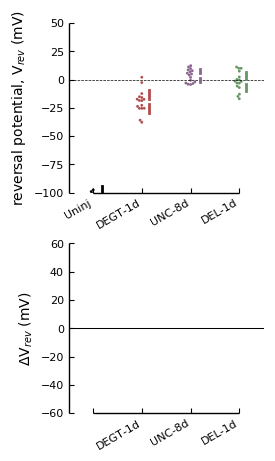

In [40]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
#
plt.figure(figsize=(2.8, 5)) 
#fig_size=(4, 5.5)
fig1= shared_controlVrevTalk.mean_diff.plot(swarm_ylim=(-100,50), contrast_ylim=(-60,60), custom_palette=colorsESTTalk,fig_size=(3,5),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label= 'ΔV$_{rev}$ (mV)',
                                    swarm_label='reversal potential, V$_{rev}$ (mV)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs


fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linestyle='--',linewidth=0.5)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=AxisLegendSize)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=AxisLegendSize)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))
fig1.axes[0].get_yaxis().set_tick_params(direction='in')
fig1.axes[1].get_yaxis().set_tick_params(direction='in')
fig1.axes[0].get_xaxis().set_tick_params(direction='in')
fig1.axes[1].get_xaxis().set_tick_params(direction='in')

labels = ['Uninj','DEGT-1d', 'UNC-8d', 'DEL-1d', 'MEC-10d','MEC-4d']
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right',fontsize=AxisLegendSize)
labels2 = ['','DEGT-1d', 'UNC-8d', 'DEL-1d', 'MEC-10d','MEC-4d']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right',fontsize=AxisLegendSize)

plt.gcf().subplots_adjust(bottom=0.1, left=0.25,right=None, top=None,hspace=2, wspace=0.2) 
plt.savefig(filedir+"Fig1-EstStat-NaGlu-MeanVrev"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig1-EstStat-NaGlu-MeanVrevTalk"+'.pdf')




In [41]:
shared_controlVrev.mean_diff

DABEST v0.2.4
             
Good afternoon!
The current time is Thu Dec 17 13:35:14 2020.

The unpaired mean difference between Uninj and DT1d is 30.8 [95%CI 22.3, 38.3].
The two-sided p-value of the Mann-Whitney test is 3.5e-15.

The unpaired mean difference between Uninj and U8d is 58.5 [95%CI 50.0, 66.5].
The two-sided p-value of the Mann-Whitney test is 1.09e-21.

The unpaired mean difference between Uninj and Del1d is -2.72 [95%CI -20.4, 13.6].
The two-sided p-value of the Mann-Whitney test is 0.784.

The unpaired mean difference between Uninj and M10d is 12.7 [95%CI -0.0546, 23.6].
The two-sided p-value of the Mann-Whitney test is 0.0798.

The unpaired mean difference between Uninj and M4d is 53.1 [95%CI 45.2, 61.0].
The two-sided p-value of the Mann-Whitney test is 3.71e-28.

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero di

# Mean Current cal Inititial current

In [42]:
InitialCurrent = df[(df.Injection.isin(["mg012","mg419mg012","pTL69mg012","mg418mg012","mg512mg012","pTL70mg012","uninjected","mg418"])) & (df.StartSol.isin(["NaGlu1"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!
#InitialCurrent = df[(df.Injection.isin(["mg418"])) & (df.StartSol.isin(["NaGlu1"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!

In [43]:
ExInitialCurrent = InitialCurrent.pivot(columns='Injection', values='MeanSTART').describe().T
ExInitialCurrent.to_csv(filedir+'ExInitialCurrent.csv', header=True, sep=',', mode='w')

MeanIniCurrent = ExInitialCurrent['mean']*1000000
MeanIniCurrent = MeanIniCurrent.round(2)
SDIniCurrent = ExInitialCurrent['std']*1000000
SDIniCurrent = SDIniCurrent.round(2)
countIniCurrent  = ExInitialCurrent['count']
SEMIniCurrent = SDIniCurrent /countIniCurrent 
SEMIniCurrent = SEMIniCurrent.round(3)

print(MeanIniCurrent)
print(SEMIniCurrent)
print(countIniCurrent)

Injection
mg012         -0.11
mg418         -0.53
mg418mg012    -0.59
mg419mg012   -10.99
mg512mg012    -0.21
pTL69mg012    -1.68
pTL70mg012    -0.17
uninjected    -0.11
Name: mean, dtype: float64
Injection
mg012         0.004
mg418         0.019
mg418mg012    0.003
mg419mg012    0.085
mg512mg012    0.009
pTL69mg012    0.017
pTL70mg012    0.010
uninjected    0.001
dtype: float64
Injection
mg012          11.0
mg418          15.0
mg418mg012    111.0
mg419mg012     99.0
mg512mg012     19.0
pTL69mg012     59.0
pTL70mg012     17.0
uninjected    156.0
Name: count, dtype: float64


## mean +- SEM Vrev (Initial current)

In [44]:
ExInitialVrev = InitialCurrent.pivot(columns='Injection', values='VrevSTART').describe().T
ExInitialVrev.to_csv(filedir+'ExInitialVrev.csv', header=True, sep=',', mode='w')
MeanIniCurVrev = ExInitialVrev['mean']*1000
MeanIniCurVrev = MeanIniCurVrev.round(2)
SDIniCurVrev = ExInitialVrev['std']*1000
SDIniCurVrev = SDIniCurVrev.round(2)

countIniCurVrev  = ExInitialVrev['count']
SEMIniCurVrev = SDIniCurVrev/countIniCurVrev
SEMIniCurVrev = SEMIniCurVrev.round(3)

print(MeanIniCurVrev)
print(SEMIniCurVrev)
print(countIniCurVrev)

Injection
mg012        -67.28
mg418        -23.99
mg418mg012   -24.06
mg419mg012    -1.76
mg512mg012   -42.12
pTL69mg012     3.67
pTL70mg012   -57.54
uninjected   -54.82
Name: mean, dtype: float64
Injection
mg012         1.686
mg418         0.717
mg418mg012    0.135
mg419mg012    0.107
mg512mg012    1.089
pTL69mg012    0.163
pTL70mg012    1.958
uninjected    0.376
dtype: float64
Injection
mg012          11.0
mg418          15.0
mg418mg012    109.0
mg419mg012     97.0
mg512mg012     19.0
pTL69mg012     59.0
pTL70mg012     16.0
uninjected    107.0
Name: count, dtype: float64


## mean +- SEM Vrest (Initial current)

# commetn: Vrest pTL69 MIX OF WITH AND WITHOUT BENZAMIL

### there is an error in the ratio data excel sheet with the Vres as I  sort the columns while some fields were empty in Vrest. now, something ist werid! neeed to check this

In [45]:
ExInitialVrest = InitialCurrent.pivot(columns='Injection', values='RestingVM').describe().T
ExInitialVrest.to_csv(filedir+'ExInitialVrest.csv', header=True, sep=',', mode='w')
MeanIniCurVrest = ExInitialVrest['mean']
MeanIniCurVrest = MeanIniCurVrest.round(2)
SDIniCurVrest = ExInitialVrest['std']
SDIniCurVrest = SDIniCurVrest.round(2)

countIniCurVrest  = ExInitialVrest['count']
SEMIniCurVrest = SDIniCurVrest/countIniCurVrest
SEMIniCurVrest = SEMIniCurVrest.round(2)

print(MeanIniCurVrest)
print(SEMIniCurVrest)
print(countIniCurVrest)

Injection
mg012          7.56
mg418        -23.69
mg418mg012    -5.29
mg419mg012    -4.44
mg512mg012    29.82
pTL69mg012   -16.18
pTL70mg012    -9.99
uninjected    -5.05
Name: mean, dtype: float64
Injection
mg012         0.79
mg418         1.02
mg418mg012    0.24
mg419mg012    0.18
mg512mg012    0.44
pTL69mg012    0.59
pTL70mg012    1.31
uninjected    0.20
dtype: float64
Injection
mg012          11.0
mg418          15.0
mg418mg012     90.0
mg419mg012     97.0
mg512mg012     19.0
pTL69mg012     59.0
pTL70mg012     17.0
uninjected    156.0
Name: count, dtype: float64


## Figure 3: Pharmacology 

#### Amiloride Analoga 30 uM


In [46]:
#sort data for amiloride!!!!
#Plot1
Amil30uninj = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluAmil30"]))] 
#Plot2
Bmil30uninj = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluBmil30"]))]
#Plot3
EIPA30uninj = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluEipa30"]))]
#Plot4
Phen30uninj = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluPhen30"]))]
#Plot5
Bzd30uninj = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluBzd30"]))] 


In [47]:
Amil30 = Amil30uninj
Bmil30 = Bmil30uninj
EIPA30 = EIPA30uninj
Phen30 = Phen30uninj
Bzd30 = Bzd30uninj 


# ESTIMATION STATISTICS ACCORDING TO CHANNEL - AMIL. ANALOG

### AMIL analog & DEGT-1d

In [48]:
Img418Amil = Amil30uninj.loc[Amil30uninj['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Amil.columns = ['DT1d-Amil']

Img418Bmil = Bmil30uninj.loc[Bmil30uninj['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Bmil.columns = ['DT1d-Bmil']

Img418EIPA = EIPA30uninj.loc[EIPA30uninj['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418EIPA.columns = ['DT1d-Eipa']

Img418Phen= Phen30uninj.loc[Phen30uninj['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Phen.columns = ['DT1d-Phen']

Img418Bzd= Bzd30uninj.loc[Bzd30uninj['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Bzd.columns = ['DT1d-Bzd']


UninjAmil = Amil30uninj.loc[Amil30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjAmil.columns = ['Uninj-Amil']

UninjBmil = Bmil30uninj.loc[Bmil30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjBmil.columns = ['Uninj-Bmil']

UninjEIPA = EIPA30uninj.loc[EIPA30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjEIPA.columns = ['Uninj-Eipa']

UninjPhen = Phen30uninj.loc[Phen30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjPhen.columns = ['Uninj-Phen']

UninjBzd = Bzd30uninj.loc[Bzd30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjBzd.columns = ['Uninj-Bzd']

#concatenateData
IDT1UninjConcat = pd.concat([Img418Amil.reset_index(drop=True),Img418Bmil.reset_index(drop=True),Img418EIPA.reset_index(drop=True),Img418Phen.reset_index(drop=True),Img418Bzd.reset_index(drop=True),UninjAmil.reset_index(drop=True),UninjBmil.reset_index(drop=True),UninjEIPA.reset_index(drop=True),UninjPhen.reset_index(drop=True),UninjBzd.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doing
IDT1UninjConcatuA = IDT1UninjConcat.astype(float)*1000000

# #load Data
shared_controlIDT1Uninj = dabest.load(IDT1UninjConcatuA, idx=(('Uninj-Amil','DT1d-Amil',),('Uninj-Bmil','DT1d-Bmil',),('Uninj-Eipa','DT1d-Eipa',),('Uninj-Phen','DT1d-Phen',),('Uninj-Bzd','DT1d-Bzd'))) 
shared_controlIDT1Uninj


DABEST v0.2.4
             
Good afternoon!
The current time is Thu Dec 17 13:35:18 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. DT1d-Amil minus Uninj-Amil
2. DT1d-Bmil minus Uninj-Bmil
3. DT1d-Eipa minus Uninj-Eipa
4. DT1d-Phen minus Uninj-Phen
5. DT1d-Bzd minus Uninj-Bzd

5000 resamples will be used to generate the effect size bootstraps.

In [49]:
shared_controlIDT1Uninj.mean_diff

DABEST v0.2.4
             
Good afternoon!
The current time is Thu Dec 17 13:35:19 2020.

The unpaired mean difference between Uninj-Amil and DT1d-Amil is 0.00799 [95%CI -0.0124, 0.0293].
The two-sided p-value of the Mann-Whitney test is 0.213.

The unpaired mean difference between Uninj-Bmil and DT1d-Bmil is 0.00728 [95%CI -0.00872, 0.0327].
The two-sided p-value of the Mann-Whitney test is 0.605.

The unpaired mean difference between Uninj-Eipa and DT1d-Eipa is 0.00732 [95%CI -0.00807, 0.0265].
The two-sided p-value of the Mann-Whitney test is 0.43.

The unpaired mean difference between Uninj-Phen and DT1d-Phen is -0.00432 [95%CI -0.0228, 0.0163].
The two-sided p-value of the Mann-Whitney test is 0.323.

The unpaired mean difference between Uninj-Bzd and DT1d-Bzd is 0.0041 [95%CI -0.0114, 0.0251].
The two-sided p-value of the Mann-Whitney test is 0.773.

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the like

/Users/wormsenselab/anaconda3/envs/dabest/lib/python3.7/site-packages/seaborn/categorical.py:1243: RuntimeWarning: invalid value encountered in sqrt
  dx = np.sqrt(d ** 2 - dy ** 2) * 1.05


<Figure size 216x288 with 0 Axes>

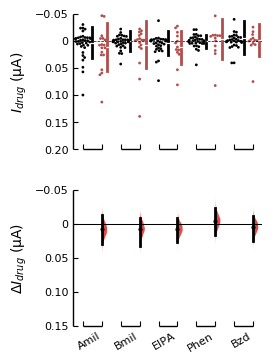

In [50]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
plt.figure(figsize=(3, 4)) 
colorsESTDT1=[(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10)]
#colorsEST = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.30, 0.69, 0.29),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00)]

fig1= shared_controlIDT1Uninj.mean_diff.plot(swarm_ylim=(0.2,-0.05), contrast_ylim=(0.15,-0.05), custom_palette=colorsESTDT1,fig_size=(3, 4),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='Δ$\it{I}$$_{drug}$ (µA)',
                                    swarm_label='$\it{I}$$_{drug}$ (µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))  

fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linestyle='--',linewidth=0.5)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=AxisLegendSize)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=AxisLegendSize)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

labels = []
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right',fontsize=AxisLegendSize)
labels2 = ['','Amil','','Bmil','','EIPA','',"Phen",'','Bzd']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right',fontsize=AxisLegendSize)
fig1.axes[0].get_yaxis().set_tick_params(direction='in')
fig1.axes[1].get_yaxis().set_tick_params(direction='in')
fig1.axes[0].get_xaxis().set_tick_params(direction='in')
fig1.axes[1].get_xaxis().set_tick_params(direction='in')


fig1.axes[0].set_yticks([0.2,0.15,0.1,0.05,0,-0.05])
plt.draw()      # Note, this line is important
labels = [l.get_text() for l in fig1.axes[0].get_yticklabels()]
labels[4] = '0'
fig1.axes[0].set_yticklabels(labels)

fig1.axes[1].set_yticks([0.15,0.1,0.05,0,-0.05])
plt.draw()      # Note, this line is important
labels = [l.get_text() for l in fig1.axes[1].get_yticklabels()]
labels[3] = '0'
fig1.axes[1].set_yticklabels(labels)


plt.gcf().subplots_adjust(bottom=0.1, left=0.27,right=None, top=None,hspace=1, wspace=0.2) 
plt.savefig(filedir+"Fig3-EstStat-IDT1Uninj"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig3-EstStat-IDT1Uninj"+'.pdf')




### AMIL analog & UNC-8d

In [51]:
IpTL69Amil = Amil30uninj.loc[Amil30uninj['Injection'] == 'pTL69mg012',['DELTA']] #returns a data frame 
IpTL69Amil.columns = ['U8d-Amil']

IpTL69Bmil = Bmil30uninj.loc[Bmil30uninj['Injection'] == 'pTL69mg012',['DELTA']] #returns a data frame 
IpTL69Bmil.columns = ['U8d-Bmil']

IpTL69EIPA = EIPA30uninj.loc[EIPA30uninj['Injection'] == 'pTL69mg012',['DELTA']] #returns a data frame 
IpTL69EIPA.columns = ['U8d-Eipa']

IpTL69Phen= Phen30uninj.loc[Phen30uninj['Injection'] == 'pTL69mg012',['DELTA']] #returns a data frame 
IpTL69Phen.columns = ['U8d-Phen']

IpTL69Bzd= Bzd30uninj.loc[Bzd30uninj['Injection'] == 'pTL69mg012',['DELTA']] #returns a data frame 
IpTL69Bzd.columns = ['U8d-Bzd']


UninjAmil = Amil30uninj.loc[Amil30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjAmil.columns = ['Uninj-Amil']

UninjBmil = Bmil30uninj.loc[Bmil30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjBmil.columns = ['Uninj-Bmil']

UninjEIPA = EIPA30uninj.loc[EIPA30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjEIPA.columns = ['Uninj-Eipa']

UninjPhen = Phen30uninj.loc[Phen30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjPhen.columns = ['Uninj-Phen']

UninjBzd = Bzd30uninj.loc[Bzd30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjBzd.columns = ['Uninj-Bzd']

#concatenateData
IU8dUninjConcat = pd.concat([IpTL69Amil.reset_index(drop=True),IpTL69Bmil.reset_index(drop=True),IpTL69EIPA.reset_index(drop=True),IpTL69Phen.reset_index(drop=True),IpTL69Bzd.reset_index(drop=True),UninjAmil.reset_index(drop=True),UninjBmil.reset_index(drop=True),UninjEIPA.reset_index(drop=True),UninjPhen.reset_index(drop=True),UninjBzd.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doing
IU8dUninjConcatuA = IU8dUninjConcat.astype(float)*1000000

# #load Data
shared_controlIU8dUninj = dabest.load(IU8dUninjConcatuA, idx=(('Uninj-Amil','U8d-Amil',),('Uninj-Bmil','U8d-Bmil',),('Uninj-Eipa','U8d-Eipa',),('Uninj-Phen','U8d-Phen',),('Uninj-Bzd','U8d-Bzd'))) 
shared_controlIU8dUninj


DABEST v0.2.4
             
Good afternoon!
The current time is Thu Dec 17 13:35:21 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. U8d-Amil minus Uninj-Amil
2. U8d-Bmil minus Uninj-Bmil
3. U8d-Eipa minus Uninj-Eipa
4. U8d-Phen minus Uninj-Phen
5. U8d-Bzd minus Uninj-Bzd

5000 resamples will be used to generate the effect size bootstraps.

In [52]:
shared_controlIU8dUninj.mean_diff

DABEST v0.2.4
             
Good afternoon!
The current time is Thu Dec 17 13:35:22 2020.

The unpaired mean difference between Uninj-Amil and U8d-Amil is 0.219 [95%CI 0.0274, 0.29].
The two-sided p-value of the Mann-Whitney test is 0.0296.

The unpaired mean difference between Uninj-Bmil and U8d-Bmil is 0.866 [95%CI 0.64, 1.13].
The two-sided p-value of the Mann-Whitney test is 2.08e-09.

The unpaired mean difference between Uninj-Eipa and U8d-Eipa is 0.607 [95%CI 0.451, 0.832].
The two-sided p-value of the Mann-Whitney test is 4.92e-06.

The unpaired mean difference between Uninj-Phen and U8d-Phen is 0.183 [95%CI 0.12, 0.263].
The two-sided p-value of the Mann-Whitney test is 2.86e-06.

The unpaired mean difference between Uninj-Bzd and U8d-Bzd is 0.32 [95%CI 0.17, 0.582].
The two-sided p-value of the Mann-Whitney test is 1.29e-05.

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing 

<Figure size 216x288 with 0 Axes>

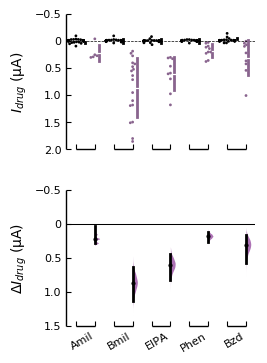

In [53]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
plt.figure(figsize=(3, 4)) 
colorsESTU8=[(0.00, 0.00, 0.00),(0.60, 0.31,0.64),(0.00, 0.00, 0.00),(0.60, 0.31,0.64),(0.00, 0.00, 0.00),(0.60, 0.31,0.64),(0.00, 0.00, 0.00),(0.60, 0.31,0.64),(0.00, 0.00, 0.00),(0.60, 0.31,0.64)]
#colorsEST = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.30, 0.69, 0.29),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00)]

fig1= shared_controlIU8dUninj.mean_diff.plot(swarm_ylim=(2,-0.5), contrast_ylim=(1.5,-0.5), custom_palette=colorsESTU8,fig_size=(3, 4),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='Δ$\it{I}$$_{drug}$ (µA)',
                                    swarm_label='$\it{I}$$_{drug}$ (µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))  

fig1.axes[0].plot([-1,20], [0,0], 'k-', linestyle='--',linewidth=0.5)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=AxisLegendSize)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=AxisLegendSize)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

labels = []
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right',fontsize=AxisLegendSize)
labels2 = ['','Amil','','Bmil','','EIPA','',"Phen",'','Bzd']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right',fontsize=AxisLegendSize)
fig1.axes[0].get_yaxis().set_tick_params(direction='in')
fig1.axes[1].get_yaxis().set_tick_params(direction='in')
fig1.axes[0].get_xaxis().set_tick_params(direction='in')
fig1.axes[1].get_xaxis().set_tick_params(direction='in')

fig1.axes[0].set_yticks([2.0,1.5,1.0,0.5,0,-0.5])
plt.draw()      # Note, this line is important
labels = [l.get_text() for l in fig1.axes[0].get_yticklabels()]
labels[4] = '0'
fig1.axes[0].set_yticklabels(labels)

fig1.axes[1].set_yticks([1.5,1.0,0.5,0,-0.5])
plt.draw()      # Note, this line is important
labels = [l.get_text() for l in fig1.axes[1].get_yticklabels()]
labels[3] = '0'
fig1.axes[1].set_yticklabels(labels)



plt.gcf().subplots_adjust(bottom=0.1, left=0.27,right=None, top=None,hspace=1, wspace=0.2) 
plt.savefig(filedir+"Fig3-EstStat-IU8Uninj"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig3-EstStat-IU8Uninj"+'.pdf')




In [54]:
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))  

fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000',linestyle='--',linewidth=0.5)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=AxisLegendSize)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=AxisLegendSize)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))


labels = []
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right',fontsize= AxisLegendSize)
labels2 = ['','Ibu','','Fibu','','Diclo','',"Asp",'','SA']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right',fontsize= AxisLegendSize)
fig1.axes[0].get_yaxis().set_tick_params(direction='in')
fig1.axes[1].get_yaxis().set_tick_params(direction='in')
fig1.axes[0].get_xaxis().set_tick_params(direction='in')
fig1.axes[1].get_xaxis().set_tick_params(direction='in')
fig1.axes[1].set_yticks([0.5,0,-1,-0.5,-1])
plt.draw()      # Note, this line is important
labels = [l.get_text() for l in fig1.axes[1].get_yticklabels()]
labels[1] = '0'
fig1.axes[1].set_yticklabels(labels)



[Text(0, 1.5, '1.5'),
 Text(0, 1.0, '0'),
 Text(0, 0.5, '0.5'),
 Text(0, 0.0, '0'),
 Text(0, -0.5, '−0.5')]

<Figure size 432x288 with 0 Axes>

### AMIL analog & MEC-4d

In [55]:
Img419Amil = Amil30uninj.loc[Amil30uninj['Injection'] == 'mg419mg012',['DELTA']] #returns a data frame 
Img419Amil.columns = ['M4d-Amil']

Img419Bmil = Bmil30uninj.loc[Bmil30uninj['Injection'] == 'mg419mg012',['DELTA']] #returns a data frame 
Img419Bmil.columns = ['M4d-Bmil']

Img419EIPA = EIPA30uninj.loc[EIPA30uninj['Injection'] == 'mg419mg012',['DELTA']] #returns a data frame 
Img419EIPA.columns = ['M4d-Eipa']

Img419Phen= Phen30uninj.loc[Phen30uninj['Injection'] == 'mg419mg012',['DELTA']] #returns a data frame 
Img419Phen.columns = ['M4d-Phen']

Img419Bzd= Bzd30uninj.loc[Bzd30uninj['Injection'] == 'mg419mg012',['DELTA']] #returns a data frame 
Img419Bzd.columns = ['M4d-Bzd']


UninjAmil = Amil30uninj.loc[Amil30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjAmil.columns = ['Uninj-Amil']

UninjBmil = Bmil30uninj.loc[Bmil30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjBmil.columns = ['Uninj-Bmil']

UninjEIPA = EIPA30uninj.loc[EIPA30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjEIPA.columns = ['Uninj-Eipa']

UninjPhen = Phen30uninj.loc[Phen30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjPhen.columns = ['Uninj-Phen']

UninjBzd = Bzd30uninj.loc[Bzd30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjBzd.columns = ['Uninj-Bzd']

#concatenateData
IM4dUninjConcat = pd.concat([Img419Amil.reset_index(drop=True),Img419Bmil.reset_index(drop=True),Img419EIPA.reset_index(drop=True),Img419Phen.reset_index(drop=True),Img419Bzd.reset_index(drop=True),UninjAmil.reset_index(drop=True),UninjBmil.reset_index(drop=True),UninjEIPA.reset_index(drop=True),UninjPhen.reset_index(drop=True),UninjBzd.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doing
IM4dUninjConcatuA = IM4dUninjConcat.astype(float)*1000000

# #load Data
shared_controlIM4dUninj = dabest.load(IM4dUninjConcatuA, idx=(('Uninj-Amil','M4d-Amil',),('Uninj-Bmil','M4d-Bmil',),('Uninj-Eipa','M4d-Eipa',),('Uninj-Phen','M4d-Phen',),('Uninj-Bzd','M4d-Bzd'))) 
shared_controlIM4dUninj


DABEST v0.2.4
             
Good afternoon!
The current time is Thu Dec 17 13:35:23 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. M4d-Amil minus Uninj-Amil
2. M4d-Bmil minus Uninj-Bmil
3. M4d-Eipa minus Uninj-Eipa
4. M4d-Phen minus Uninj-Phen
5. M4d-Bzd minus Uninj-Bzd

5000 resamples will be used to generate the effect size bootstraps.

In [56]:
shared_controlIM4dUninj.mean_diff

DABEST v0.2.4
             
Good afternoon!
The current time is Thu Dec 17 13:35:25 2020.

The unpaired mean difference between Uninj-Amil and M4d-Amil is 6.71 [95%CI 5.12, 8.95].
The two-sided p-value of the Mann-Whitney test is 2.07e-15.

The unpaired mean difference between Uninj-Bmil and M4d-Bmil is 7.81 [95%CI 5.44, 11.1].
The two-sided p-value of the Mann-Whitney test is 2.03e-12.

The unpaired mean difference between Uninj-Eipa and M4d-Eipa is 5.53 [95%CI 3.79, 8.16].
The two-sided p-value of the Mann-Whitney test is 2.07e-11.

The unpaired mean difference between Uninj-Phen and M4d-Phen is 5.18 [95%CI 2.94, 7.99].
The two-sided p-value of the Mann-Whitney test is 2.02e-09.

The unpaired mean difference between Uninj-Bzd and M4d-Bzd is 0.607 [95%CI -0.0395, 1.68].
The two-sided p-value of the Mann-Whitney test is 0.00219.

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the e

# estimation plot M4 amiloride

<Figure size 216x288 with 0 Axes>

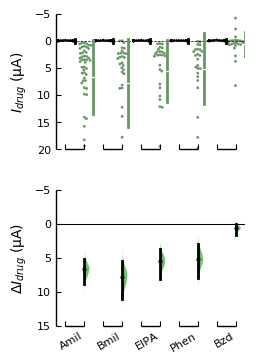

In [57]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
plt.figure(figsize=(3, 4)) 
colorsESTM4=[(0.00, 0.00, 0.00),(0.30, 0.69, 0.29),(0.00, 0.00, 0.00),(0.30, 0.69, 0.29),(0.00, 0.00, 0.00),(0.30, 0.69, 0.29),(0.00, 0.00, 0.00),(0.30, 0.69, 0.29),(0.00, 0.00, 0.00),(0.30, 0.69, 0.29)]
#colorsEST = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.30, 0.69, 0.29),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00)]
#

fig1= shared_controlIM4dUninj.mean_diff.plot(swarm_ylim=(20,-5), contrast_ylim=(15,-5), custom_palette=colorsESTM4,fig_size=(3, 4),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='Δ$\it{I}$$_{drug}$ (µA)',
                                    swarm_label='$\it{I}$$_{drug}$ (µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs
 

fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linestyle='--',linewidth=0.5)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=AxisLegendSize)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=AxisLegendSize)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

labels = []
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right',fontsize= AxisLegendSize)
labels2 = ['','Amil','','Bmil','','EIPA','',"Phen",'','Bzd']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right',fontsize= AxisLegendSize)
fig1.axes[0].get_yaxis().set_tick_params(direction='in')
fig1.axes[1].get_yaxis().set_tick_params(direction='in')
fig1.axes[0].get_xaxis().set_tick_params(direction='in')
fig1.axes[1].get_xaxis().set_tick_params(direction='in')

plt.gcf().subplots_adjust(bottom=0.1, left=0.27,right=None, top=None,hspace=1, wspace=0.2) 
plt.savefig(filedir+"Fig3-EstStat-IM4Uninj"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig3-EstStat-IM4Uninj"+'.pdf')




### calculate mean to pick representative trace Amil Analog

### amiloride

In [58]:
pivotAmil30uninj = Amil30uninj.pivot(columns='Injection', values='DELTA').describe().T

Amil30uninj.to_csv(filedirManuscriptStat+'Amiloride30uM.csv', header=True, sep=',', mode='w')

MeanAmil30 = pivotAmil30uninj['mean']*1000000
MeanAmil30 = MeanAmil30.round(2)
SDAmil30 = pivotAmil30uninj['std']*1000000
SDAmil30 = SDAmil30.round(2)
countAmil30 = pivotAmil30uninj['count']
SEMAmil30 = SDAmil30/countAmil30
SEMAmil30 = SEMAmil30.round(3)
print(countAmil30)



Injection
mg418mg012    19.0
mg419mg012    50.0
pTL69mg012     5.0
uninjected    37.0
Name: count, dtype: float64


### benzamil

In [59]:
pivotBmil30uninj = Bmil30uninj.pivot(columns='Injection', values='DELTA').describe().T

Bmil30uninj.to_csv(filedirManuscriptStat+'Benzamil30uM.csv', header=True, sep=',', mode='w')

MeanBmil30 = pivotBmil30uninj['mean']*1000000
MeanBmil30 = MeanBmil30.round(2)
SDBmil30 = pivotBmil30uninj['std']*1000000
SDBmil30 = SDBmil30.round(2)
countBmil30 = pivotBmil30uninj['count']
SEMBmil30 = SDBmil30/countBmil30
SEMBmil30 = SEMBmil30.round(3)
print(countBmil30)


Injection
mg418mg012    18.0
mg419mg012    32.0
pTL69mg012    18.0
uninjected    38.0
Name: count, dtype: float64


#### EIPA

In [60]:
pivotEIPA30uninj = EIPA30uninj.pivot(columns='Injection', values='DELTA').describe().T

EIPA30uninj.to_csv(filedirManuscriptStat+'EIPA30uM.csv', header=True, sep=',', mode='w')

MeanEIPA30 = pivotEIPA30uninj['mean']*1000000
MeanEIPA30 = MeanEIPA30.round(2)
SDEIPA30 = pivotEIPA30uninj['std']*1000000
SDEIPA30 = SDEIPA30.round(2)
countEIPA30 = pivotEIPA30uninj['count']
SEMEIPA30 = SDEIPA30/countEIPA30
SEMEIPA30 = SEMEIPA30.round(3)
print(countEIPA30)


Injection
mg418mg012    13.0
mg419mg012    27.0
pTL69mg012     9.0
uninjected    35.0
Name: count, dtype: float64


### Phenamil

In [61]:
pivotPhen30uninj = Phen30uninj.pivot(columns='Injection', values='DELTA').describe().T

Phen30uninj.to_csv(filedirManuscriptStat+'Phenamil30uM.csv', header=True, sep=',', mode='w')

MeanPhen30 = pivotPhen30uninj['mean']*1000000
MeanPhen30 = MeanPhen30.round(2)
SDPhen30 = pivotPhen30uninj['std']*1000000
SDPhen30 = SDPhen30.round(2)
countPhen30 = pivotPhen30uninj['count']
SEMPhen30 = SDPhen30/countPhen30
SEMPhen30 = SEMPhen30.round(3)
print(countPhen30)


Injection
mg418mg012    13.0
mg419mg012    26.0
pTL69mg012    10.0
uninjected    32.0
Name: count, dtype: float64


### benzamidine

In [62]:
pivotBzd30uninj = Bzd30uninj.pivot(columns='Injection', values='DELTA').describe().T

Bzd30uninj.to_csv(filedirManuscriptStat+'Benzamidine30uM.csv', header=True, sep=',', mode='w')

MeanBzd30 = pivotBzd30uninj['mean']*1000000
MeanBzd30 = MeanBzd30.round(2)
SDBzd30 = pivotBzd30uninj['std']*1000000
SDBzd30 = SDBzd30.round(2)
countBzd30 = pivotBzd30uninj['count']
SEMBzd30 = SDBzd30/countBzd30
SEMBzd30 = SEMBzd30.round(3)
print(countBzd30)


Injection
mg418mg012    13.0
mg419mg012    25.0
pTL69mg012     9.0
uninjected    32.0
Name: count, dtype: float64


# Estimation statistics for NSAIDs

In [63]:
#SortNSAID Data
Ibu30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluIbu30"]))] 
#Plot2
Fibu30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluFibu30"]))]
#Plot3
Diclo30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluDiclo30"]))]
#Plot4
Asp30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluAsp30"]))]
#Plot5
SA30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluSA30"]))] 


## calculate mean values to pick representative traces NSAIDs

In [64]:
pivotIbu30 = Ibu30.pivot(columns='Injection', values='DELTA').describe().T

Ibu30.to_csv(filedirManuscriptStat+'Ibuprofen30uM.csv', header=True, sep=',', mode='w')

MeanIbu30 = pivotIbu30['mean']*1000000
MeanIbu30 = MeanIbu30.round(2)
SDIbu30 = pivotIbu30['std']*1000000
SDIbu30 = SDIbu30.round(2)
countIbu30 = pivotIbu30['count']
SEMIbu30 = SDIbu30/countIbu30
SEMIbu30 = SEMIbu30.round(3)
print(countIbu30)

Injection
mg418mg012    18.0
mg419mg012    13.0
pTL69mg012    15.0
uninjected    17.0
Name: count, dtype: float64


### Flurbiprofen

In [65]:
pivotFibu30 = Fibu30.pivot(columns='Injection', values='DELTA').describe().T

Fibu30.to_csv(filedirManuscriptStat+'Flurbiprofen30uM.csv', header=True, sep=',', mode='w')

MeanFibu30 = pivotFibu30['mean']*1000000
MeanFibu30 = MeanFibu30.round(2)
SDFibu30 = pivotFibu30['std']*1000000
SDFibu30 = SDFibu30.round(2)
countFibu30 = pivotFibu30['count']
SEMFibu30 = SDFibu30/countFibu30
SEMFibu30 = SEMFibu30.round(3)
print(countFibu30)

Injection
mg418mg012     5.0
mg419mg012     8.0
pTL69mg012    10.0
uninjected    10.0
Name: count, dtype: float64


### Diclofenac

In [66]:
pivotDiclo30 = Diclo30.pivot(columns='Injection', values='DELTA').describe().T

Diclo30.to_csv(filedirManuscriptStat+'Diclofenac30uM.csv', header=True, sep=',', mode='w')

MeanDiclo30 = pivotDiclo30['mean']*1000000
MeanDiclo30 = MeanDiclo30.round(2)
SDDiclo30 = pivotDiclo30['std']*1000000
SDDiclo30 = SDDiclo30.round(2)
countDiclo30 = pivotDiclo30['count']
SEMDiclo30 = SDDiclo30/countDiclo30
SEMDiclo30 = SEMDiclo30.round(3)
print(countDiclo30)

Injection
mg418mg012     5.0
mg419mg012    25.0
pTL69mg012    13.0
uninjected    34.0
Name: count, dtype: float64


### Aspirin

In [67]:
pivotAsp30 = Asp30.pivot(columns='Injection', values='DELTA').describe().T

Asp30.to_csv(filedirManuscriptStat+'Aspirin30uM.csv', header=True, sep=',', mode='w')

MeanAsp30 = pivotAsp30['mean']*1000000
MeanAsp30 = MeanAsp30.round(2)
SDAsp30 = pivotAsp30['std']*1000000
SDAsp30 = SDAsp30.round(2)
countAsp30 = pivotAsp30['count']
SEMAsp30 = SDAsp30/countAsp30
SEMAsp30 = SEMAsp30.round(3)
print(countAsp30)

Injection
mg418mg012     5.0
mg419mg012     7.0
pTL69mg012     9.0
uninjected    10.0
Name: count, dtype: float64


### Salicycil Acid

In [68]:
pivotSA30 = SA30.pivot(columns='Injection', values='DELTA').describe().T

SA30.to_csv(filedirManuscriptStat+'SalicylicAcid30uM.csv', header=True, sep=',', mode='w')

MeanSA30 = pivotSA30['mean']*1000000
MeanSA30 = MeanSA30.round(2)
SDSA30 = pivotSA30['std']*1000000
SDSA30 = SDSA30.round(2)
countSA30 = pivotSA30['count']
SEMSA30 = SDSA30/countSA30
SEMSA30 = SEMSA30.round(3)
print(countSA30)

Injection
mg418mg012     4.0
mg419mg012     7.0
pTL69mg012    10.0
uninjected    10.0
Name: count, dtype: float64


# ESTIMATION STATISTICS ACCORDING TO CHANNEL - NSAIDs

### NSAIDS estimation stats DEGT-1d

In [69]:
Img418Ibu30= Ibu30.loc[Ibu30['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Ibu30.columns = ['DT1d-Ibu']

Img418Fibu30 = Fibu30.loc[Fibu30['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Fibu30.columns = ['DT1d-Fibu']

Img418Diclo30= Diclo30.loc[Diclo30['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Diclo30.columns = ['DT1d-Diclo']

Img418Asp30= Asp30.loc[Asp30['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Asp30.columns = ['DT1d-Asp']

Img418SA30= SA30.loc[SA30['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418SA30.columns = ['DT1d-SA']


UninjIbu30 = Ibu30.loc[Ibu30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjIbu30.columns = ['Uninj-Ibu']

UninjFibu30 = Fibu30.loc[Fibu30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjFibu30.columns = ['Uninj-Fibu']

UninjDiclo30 = Diclo30.loc[Diclo30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjDiclo30.columns = ['Uninj-Diclo']

UninjAsp30 = Asp30.loc[Asp30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjAsp30.columns = ['Uninj-Asp']

UninjSA30 = SA30.loc[SA30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjSA30.columns = ['Uninj-SA']

#concatenateData
IDT1UninjConcat = pd.concat([Img418Ibu30.reset_index(drop=True),Img418Fibu30.reset_index(drop=True),Img418Diclo30.reset_index(drop=True),Img418Asp30.reset_index(drop=True),Img418SA30.reset_index(drop=True),UninjIbu30.reset_index(drop=True),UninjFibu30.reset_index(drop=True),UninjDiclo30.reset_index(drop=True),UninjAsp30.reset_index(drop=True),UninjSA30.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doing
IDT1UninjConcatuA = IDT1UninjConcat.astype(float)*1000000

# #load Data
shared_controlIDT1UninjNSAID = dabest.load(IDT1UninjConcatuA, idx=(('Uninj-Ibu','DT1d-Ibu',),('Uninj-Fibu','DT1d-Fibu',),('Uninj-Diclo','DT1d-Diclo',),('Uninj-Asp','DT1d-Asp',),('Uninj-SA','DT1d-SA'))) 
shared_controlIDT1UninjNSAID


DABEST v0.2.4
             
Good afternoon!
The current time is Thu Dec 17 13:35:27 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. DT1d-Ibu minus Uninj-Ibu
2. DT1d-Fibu minus Uninj-Fibu
3. DT1d-Diclo minus Uninj-Diclo
4. DT1d-Asp minus Uninj-Asp
5. DT1d-SA minus Uninj-SA

5000 resamples will be used to generate the effect size bootstraps.

<Figure size 216x288 with 0 Axes>

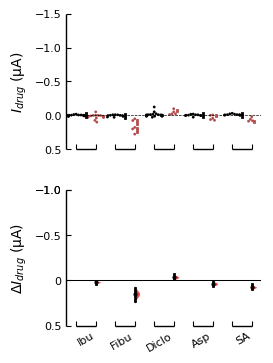

In [70]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
plt.figure(figsize=(3, 4)) 
colorsESTDT1=[(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10)]
#colorsEST = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.30, 0.69, 0.29),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00)]

fig1= shared_controlIDT1UninjNSAID.mean_diff.plot(swarm_ylim=(0.5,-1.5), contrast_ylim=(0.5,-1), custom_palette=colorsESTDT1,fig_size=(3, 4),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='Δ$\it{I}$$_{drug}$ (µA)',
                                    swarm_label='$\it{I}$$_{drug}$ (µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                    'color':'red'})#,reflines_kwargs
                                       #previous y label: ΔI-ΔIUninj (µA) 


#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))  

fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000',linestyle='--',linewidth=0.5)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=AxisLegendSize)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=AxisLegendSize)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))


labels = []
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right',fontsize= AxisLegendSize)
labels2 = ['','Ibu','','Fibu','','Diclo','',"Asp",'','SA']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right',fontsize= AxisLegendSize)
fig1.axes[0].get_yaxis().set_tick_params(direction='in')
fig1.axes[1].get_yaxis().set_tick_params(direction='in')
fig1.axes[0].get_xaxis().set_tick_params(direction='in')
fig1.axes[1].get_xaxis().set_tick_params(direction='in')
fig1.axes[1].set_yticks([0.5,0,-1,-0.5,-1])
plt.draw()      # Note, this line is important
labels = [l.get_text() for l in fig1.axes[1].get_yticklabels()]
labels[1] = '0'
fig1.axes[1].set_yticklabels(labels)



#plt.gcf().subplots_adjust(bottom=0.2, left=0.25,right=None, top=None,hspace=3.75, wspace=0.2) 
plt.gcf().subplots_adjust(bottom=0.1, left=0.25,right=None, top=None,hspace=1, wspace=0.2) 
plt.savefig(filedir+"Fig4-EstStat-IDT1Uninj-NSAID"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig4-EstStat-IDT1Uninj-NSAID"+'.pdf')




# vakues estimations stats DEGT1 NSAIDs

In [71]:
shared_controlIDT1UninjNSAID.mean_diff

DABEST v0.2.4
             
Good afternoon!
The current time is Thu Dec 17 13:35:28 2020.

The unpaired mean difference between Uninj-Ibu and DT1d-Ibu is 0.0199 [95%CI 0.00658, 0.036].
The two-sided p-value of the Mann-Whitney test is 0.00102.

The unpaired mean difference between Uninj-Fibu and DT1d-Fibu is 0.152 [95%CI 0.0832, 0.226].
The two-sided p-value of the Mann-Whitney test is 0.00269.

The unpaired mean difference between Uninj-Diclo and DT1d-Diclo is -0.0368 [95%CI -0.0753, -0.0144].
The two-sided p-value of the Mann-Whitney test is 0.00306.

The unpaired mean difference between Uninj-Asp and DT1d-Asp is 0.0368 [95%CI 0.0069, 0.0642].
The two-sided p-value of the Mann-Whitney test is 0.0758.

The unpaired mean difference between Uninj-SA and DT1d-SA is 0.0734 [95%CI 0.0413, 0.0927].
The two-sided p-value of the Mann-Whitney test is 0.00582.

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihoo

### UNC-8 NSAIDS 


In [72]:
IpTL69Ibu30= Ibu30.loc[Ibu30['Injection'] == 'pTL69mg012',['DELTA']] #returns a data frame 
IpTL69Ibu30.columns = ['U8d-Ibu']

IpTL69Fibu30 = Fibu30.loc[Fibu30['Injection'] == 'pTL69mg012',['DELTA']] #returns a data frame 
IpTL69Fibu30.columns = ['U8d-Fibu']

IpTL69Diclo30= Diclo30.loc[Diclo30['Injection'] == 'pTL69mg012',['DELTA']] #returns a data frame 
IpTL69Diclo30.columns = ['U8d-Diclo']

IpTL69Asp30= Asp30.loc[Asp30['Injection'] == 'pTL69mg012',['DELTA']] #returns a data frame 
IpTL69Asp30.columns = ['U8d-Asp']

IpTL69SA30= SA30.loc[SA30['Injection'] == 'pTL69mg012',['DELTA']] #returns a data frame 
IpTL69SA30.columns = ['U8d-SA']


UninjIbu30 = Ibu30.loc[Ibu30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjIbu30.columns = ['Uninj-Ibu']

UninjFibu30 = Fibu30.loc[Fibu30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjFibu30.columns = ['Uninj-Fibu']

UninjDiclo30 = Diclo30.loc[Diclo30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjDiclo30.columns = ['Uninj-Diclo']

UninjAsp30 = Asp30.loc[Asp30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjAsp30.columns = ['Uninj-Asp']

UninjSA30 = SA30.loc[SA30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjSA30.columns = ['Uninj-SA']

#concatenateData
IU8UninjConcat = pd.concat([IpTL69Ibu30.reset_index(drop=True),IpTL69Fibu30.reset_index(drop=True),IpTL69Diclo30.reset_index(drop=True),IpTL69Asp30.reset_index(drop=True),IpTL69SA30.reset_index(drop=True),UninjIbu30.reset_index(drop=True),UninjFibu30.reset_index(drop=True),UninjDiclo30.reset_index(drop=True),UninjAsp30.reset_index(drop=True),UninjSA30.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doing
IU8UninjConcatuA = IU8UninjConcat.astype(float)*1000000

# #load Data
shared_controlIU8UninjNSAID = dabest.load(IU8UninjConcatuA, idx=(('Uninj-Ibu','U8d-Ibu',),('Uninj-Fibu','U8d-Fibu',),('Uninj-Diclo','U8d-Diclo',),('Uninj-Asp','U8d-Asp',),('Uninj-SA','U8d-SA'))) 
shared_controlIU8UninjNSAID


DABEST v0.2.4
             
Good afternoon!
The current time is Thu Dec 17 13:35:29 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. U8d-Ibu minus Uninj-Ibu
2. U8d-Fibu minus Uninj-Fibu
3. U8d-Diclo minus Uninj-Diclo
4. U8d-Asp minus Uninj-Asp
5. U8d-SA minus Uninj-SA

5000 resamples will be used to generate the effect size bootstraps.

In [73]:
shared_controlIU8UninjNSAID.mean_diff

DABEST v0.2.4
             
Good afternoon!
The current time is Thu Dec 17 13:35:31 2020.

The unpaired mean difference between Uninj-Ibu and U8d-Ibu is 0.0259 [95%CI 0.00162, 0.0507].
The two-sided p-value of the Mann-Whitney test is 0.0235.

The unpaired mean difference between Uninj-Fibu and U8d-Fibu is 0.221 [95%CI 0.126, 0.386].
The two-sided p-value of the Mann-Whitney test is 0.00033.

The unpaired mean difference between Uninj-Diclo and U8d-Diclo is 0.242 [95%CI 0.152, 0.348].
The two-sided p-value of the Mann-Whitney test is 5.25e-06.

The unpaired mean difference between Uninj-Asp and U8d-Asp is -0.0711 [95%CI -0.163, 0.0103].
The two-sided p-value of the Mann-Whitney test is 0.391.

The unpaired mean difference between Uninj-SA and U8d-SA is -0.062 [95%CI -0.196, 0.00805].
The two-sided p-value of the Mann-Whitney test is 0.162.

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of obse

<Figure size 216x288 with 0 Axes>

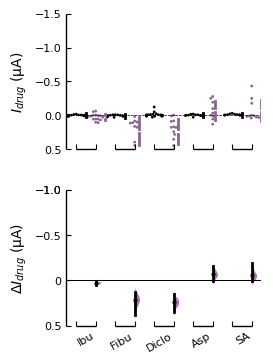

In [74]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
plt.figure(figsize=(3, 4)) 
colorsESTU8=[(0.00, 0.00, 0.00),(0.60, 0.31,0.64),(0.00, 0.00, 0.00),(0.60, 0.31,0.64),(0.00, 0.00, 0.00),(0.60, 0.31,0.64),(0.00, 0.00, 0.00),(0.60, 0.31,0.64),(0.00, 0.00, 0.00),(0.60, 0.31,0.64)]
#colorsEST = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.30, 0.69, 0.29),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00)]

fig1= shared_controlIU8UninjNSAID.mean_diff.plot(swarm_ylim=(0.5,-1.5), contrast_ylim=(0.5,-1), custom_palette=colorsESTU8,fig_size=(3, 4),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='Δ$\it{I}$$_{drug}$ (µA)',
                                    swarm_label='$\it{I}$$_{drug}$ (µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))  

fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linestyle='--',linewidth=0.5)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=AxisLegendSize)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=AxisLegendSize)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

labels = []
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right',fontsize= AxisLegendSize)
labels2 = ['','Ibu','','Fibu','','Diclo','',"Asp",'','SA']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right',fontsize= AxisLegendSize)
fig1.axes[0].get_yaxis().set_tick_params(direction='in')
fig1.axes[1].get_yaxis().set_tick_params(direction='in')
fig1.axes[0].get_xaxis().set_tick_params(direction='in')
fig1.axes[1].get_xaxis().set_tick_params(direction='in')
fig1.axes[1].set_yticks([0.5,0,-1,-0.5,-1])
plt.draw()      # Note, this line is important
labels = [l.get_text() for l in fig1.axes[1].get_yticklabels()]
labels[1] = '0'
fig1.axes[1].set_yticklabels(labels)


plt.gcf().subplots_adjust(bottom=0.1, left=0.25,right=None, top=None,hspace=1, wspace=0.2) 
plt.savefig(filedir+"Fig4-EstStat-IU8Uninj-NSAIDs"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig4-EstStat-IU8Uninj-NSAIDs"+'.pdf')




### MEC-4 NSAIDs

In [75]:
Img419Ibu30= Ibu30.loc[Ibu30['Injection'] == 'mg419mg012',['DELTA']] #returns a data frame 
Img419Ibu30.columns = ['M4d-Ibu']

Img419Fibu30 = Fibu30.loc[Fibu30['Injection'] == 'mg419mg012',['DELTA']] #returns a data frame 
Img419Fibu30.columns = ['M4d-Fibu']

Img419Diclo30= Diclo30.loc[Diclo30['Injection'] == 'mg419mg012',['DELTA']] #returns a data frame 
Img419Diclo30.columns = ['M4d-Diclo']

Img419Asp30= Asp30.loc[Asp30['Injection'] == 'mg419mg012',['DELTA']] #returns a data frame 
Img419Asp30.columns = ['M4d-Asp']

Img419SA30= SA30.loc[SA30['Injection'] == 'mg419mg012',['DELTA']] #returns a data frame 
Img419SA30.columns = ['M4d-SA']


UninjIbu30 = Ibu30.loc[Ibu30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjIbu30.columns = ['Uninj-Ibu']

UninjFibu30 = Fibu30.loc[Fibu30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjFibu30.columns = ['Uninj-Fibu']

UninjDiclo30 = Diclo30.loc[Diclo30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjDiclo30.columns = ['Uninj-Diclo']

UninjAsp30 = Asp30.loc[Asp30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjAsp30.columns = ['Uninj-Asp']

UninjSA30 = SA30.loc[SA30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjSA30.columns = ['Uninj-SA']

#concatenateData
IM4UninjConcat = pd.concat([Img419Ibu30.reset_index(drop=True),Img419Fibu30.reset_index(drop=True),Img419Diclo30.reset_index(drop=True),Img419Asp30.reset_index(drop=True),Img419SA30.reset_index(drop=True),UninjIbu30.reset_index(drop=True),UninjFibu30.reset_index(drop=True),UninjDiclo30.reset_index(drop=True),UninjAsp30.reset_index(drop=True),UninjSA30.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doing
IM4UninjConcatuA = IM4UninjConcat.astype(float)*1000000

# #load Data
shared_controlIM4UninjNSAID = dabest.load(IM4UninjConcatuA, idx=(('Uninj-Ibu','M4d-Ibu',),('Uninj-Fibu','M4d-Fibu',),('Uninj-Diclo','M4d-Diclo',),('Uninj-Asp','M4d-Asp',),('Uninj-SA','M4d-SA'))) 
shared_controlIM4UninjNSAID


DABEST v0.2.4
             
Good afternoon!
The current time is Thu Dec 17 13:35:32 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. M4d-Ibu minus Uninj-Ibu
2. M4d-Fibu minus Uninj-Fibu
3. M4d-Diclo minus Uninj-Diclo
4. M4d-Asp minus Uninj-Asp
5. M4d-SA minus Uninj-SA

5000 resamples will be used to generate the effect size bootstraps.

In [76]:
shared_controlIM4UninjNSAID.mean_diff

DABEST v0.2.4
             
Good afternoon!
The current time is Thu Dec 17 13:35:33 2020.

The unpaired mean difference between Uninj-Ibu and M4d-Ibu is -4.01 [95%CI -5.65, -2.7].
The two-sided p-value of the Mann-Whitney test is 9.93e-05.

The unpaired mean difference between Uninj-Fibu and M4d-Fibu is -3.55 [95%CI -4.47, -2.84].
The two-sided p-value of the Mann-Whitney test is 0.000449.

The unpaired mean difference between Uninj-Diclo and M4d-Diclo is -2.69 [95%CI -4.4, -1.6].
The two-sided p-value of the Mann-Whitney test is 5.39e-08.

The unpaired mean difference between Uninj-Asp and M4d-Asp is -4.59 [95%CI -7.43, -3.46].
The two-sided p-value of the Mann-Whitney test is 0.00076.

The unpaired mean difference between Uninj-SA and M4d-SA is -5.39 [95%CI -7.26, -3.89].
The two-sided p-value of the Mann-Whitney test is 0.00076.

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing th

<Figure size 216x288 with 0 Axes>

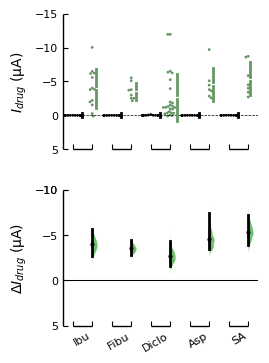

In [77]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
plt.figure(figsize=(3, 4)) 
colorsESTM4=[(0.00, 0.00, 0.00),(0.30, 0.69, 0.29),(0.00, 0.00, 0.00),(0.30, 0.69, 0.29),(0.00, 0.00, 0.00),(0.30, 0.69, 0.29),(0.00, 0.00, 0.00),(0.30, 0.69, 0.29),(0.00, 0.00, 0.00),(0.30, 0.69, 0.29)]
#colorsEST = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.30, 0.69, 0.29),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00)]

fig1= shared_controlIM4UninjNSAID.mean_diff.plot(swarm_ylim=(5,-15), contrast_ylim=(5,-10), custom_palette=colorsESTM4,fig_size=(3, 4),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='Δ$\it{I}$$_{drug}$ (µA)',
                                    swarm_label='$\it{I}$$_{drug}$ (µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))  

fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000',  linestyle='--',linewidth=0.5)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=AxisLegendSize)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=AxisLegendSize)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

labels = []
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right',fontsize= AxisLegendSize)
labels2 = ['','Ibu','','Fibu','','Diclo','',"Asp",'','SA']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right',fontsize= AxisLegendSize)
fig1.axes[0].get_yaxis().set_tick_params(direction='in')
fig1.axes[1].get_yaxis().set_tick_params(direction='in')
fig1.axes[0].get_xaxis().set_tick_params(direction='in')
fig1.axes[1].get_xaxis().set_tick_params(direction='in')
fig1.axes[1].set_yticks([5,0,-10,-5,-10])
plt.draw()      # Note, this line is important
labels = [l.get_text() for l in fig1.axes[1].get_yticklabels()]
labels[1] = '0'
fig1.axes[1].set_yticklabels(labels)


plt.gcf().subplots_adjust(bottom=0.1, left=0.25,right=None, top=None,hspace=1, wspace=0.2) 

plt.savefig(filedir+"Fig4-EstStat-IM4Uninj-NSAIDs"+'.pdf')
plt.savefig(filedirManuscript+"Fig4-EstStat-IM4Uninj-NSAIDs"+'.pdf')




# estimation statistics PH

### TODO: get mean values + SD

In [78]:
CALCHANGEinPH = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGlu64"]) & df.StartSol.isin(["NaGlu84"]))] 

CALCHANGEinPH.to_csv(filedirManuscriptStat+'ChangeInpH.csv', header=True, sep=',', mode='w')

ExInitialpH = CALCHANGEinPH.pivot(columns='Injection', values='DELTA').describe().T
#ExInitialCurrent = ExInitialCurrent.round()
ExInitialpH.to_csv(filedir+'ExInitialpH.csv', header=True, sep=',', mode='w')
#trying to replace A with uA multiplying by 1000000
#ExInitialCurrent.replace(to_replace = [ExInitialCurrent['mean']],value = 100, inplace = True)
Mean_ChangepH = ExInitialpH['mean']*1000000
Mean_ChangepH = Mean_ChangepH.round(2)
SD_ChangepH = ExInitialpH['std']*1000000
SD_ChangepH = SD_ChangepH.round(2)
print(Mean_ChangepH )
print(SD_ChangepH )

Injection
mg418mg012    0.53
mg419mg012    1.00
pTL69mg012   -1.14
uninjected   -0.03
Name: mean, dtype: float64
Injection
mg418mg012    0.41
mg419mg012    1.65
pTL69mg012    0.76
uninjected    0.10
Name: std, dtype: float64


In [79]:
#change pH START SOL MUST BE 8.4
pH = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGlu64"]) & df.StartSol.isin(["NaGlu84"]))] 

Img419pH = pH.loc[pH['Injection'] == 'mg419mg012',['DELTA']] #returns a data frame 
Img419pH.columns = ['M4d']

Img418pH = pH.loc[pH['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418pH.columns = ['DT1d']

IpTL69pH = pH.loc[pH['Injection'] == 'pTL69mg012',['DELTA']] #returns a data frame 
IpTL69pH.columns = ['U8d']

IUninjpH = pH.loc[pH['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
IUninjpH.columns = ['Uninj']

#concatenateData
IpHConcat = pd.concat([IUninjpH.reset_index(drop=True),Img418pH.reset_index(drop=True),Img419pH.reset_index(drop=True),IpTL69pH.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doin
IpHConcatuA = IpHConcat.astype(float)*1000000

#concatenateData
IpHConcatDEGT = pd.concat([IUninjpH.reset_index(drop=True),Img418pH.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doin
IpHConcatuADEGT1 = IpHConcatDEGT.astype(float)*1000000

#load Data
shared_controlIpH = dabest.load(IpHConcatuA, idx=("Uninj","DT1d",'U8d','M4d'))
shared_controlIpH

shared_controlIpH_DEGT1 = dabest.load(IpHConcatuADEGT1, idx=("Uninj","DT1d"))
shared_controlIpH_DEGT1


DABEST v0.2.4
             
Good afternoon!
The current time is Thu Dec 17 13:35:35 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. DT1d minus Uninj

5000 resamples will be used to generate the effect size bootstraps.

# get mean + SD for change in PH

In [80]:
CALCHANGEinPH = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGlu64"]) & df.StartSol.isin(["NaGlu84"]))] 

CALCHANGEinPH.to_csv(filedirManuscriptStat+'ChangeInpH.csv', header=True, sep=',', mode='w')

ExInitialpH = CALCHANGEinPH.pivot(columns='Injection', values='DELTA').describe().T
#ExInitialCurrent = ExInitialCurrent.round()
ExInitialpH.to_csv(filedir+'ExInitialpH.csv', header=True, sep=',', mode='w')
#trying to replace A with uA multiplying by 1000000
#ExInitialCurrent.replace(to_replace = [ExInitialCurrent['mean']],value = 100, inplace = True)
Mean_ChangepH = ExInitialpH['mean']*1000000
Mean_ChangepH = Mean_ChangepH.round(2)
SD_ChangepH = ExInitialpH['std']*1000000
SD_ChangepH = SD_ChangepH.round(2)
print(Mean_ChangepH )
print(SD_ChangepH )


#CALCHANGEinPH.pivot(columns='Injection', values='DELTA').describe().T 

Injection
mg418mg012    0.53
mg419mg012    1.00
pTL69mg012   -1.14
uninjected   -0.03
Name: mean, dtype: float64
Injection
mg418mg012    0.41
mg419mg012    1.65
pTL69mg012    0.76
uninjected    0.10
Name: std, dtype: float64


In [81]:
ExInitialpH

,count,mean,std,min,25%,50%,75%,max
Injection,,,,,,,,
mg418mg012,27.0,5.293114e-07,4.087354e-07,-8.030000e-08,2.915000e-07,4.870000e-07,6.333227e-07,1.949204e-06
mg419mg012,20.0,9.998817e-07,1.649496e-06,-3.200000e-06,3.010281e-07,6.539523e-07,1.820269e-06,5.256567e-06
pTL69mg012,11.0,-1.138269e-06,7.631883e-07,-2.909289e-06,-1.301463e-06,-1.010066e-06,-7.521986e-07,-2.294659e-07
uninjected,30.0,-3.066053e-08,9.820421e-08,-2.002773e-07,-1.038965e-07,-4.849671e-08,3.008033e-08,2.013751e-07


# estimation stats for pH Figure 1; estimation pH; pH estimation

In [82]:
shared_controlIpH.mean_diff

DABEST v0.2.4
             
Good afternoon!
The current time is Thu Dec 17 13:35:36 2020.

The unpaired mean difference between Uninj and DT1d is 0.56 [95%CI 0.43, 0.757].
The two-sided p-value of the Mann-Whitney test is 4.7e-09.

The unpaired mean difference between Uninj and U8d is -1.11 [95%CI -1.64, -0.758].
The two-sided p-value of the Mann-Whitney test is 1.3e-06.

The unpaired mean difference between Uninj and M4d is 1.03 [95%CI 0.357, 1.78].
The two-sided p-value of the Mann-Whitney test is 4.14e-06.

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

<Figure size 201.6x360 with 0 Axes>

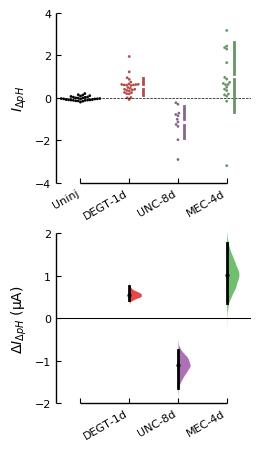

In [83]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
#plt.figure(figsize=(3.5, 3)) 

plt.figure(figsize=(2.8, 5)) 
fig1= shared_controlIpH.mean_diff.plot(swarm_ylim=(-4,4), contrast_ylim=(-2,2), custom_palette=colorsEST,fig_size=(3, 5),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='Δ$\it{I}$$_{ΔpH}$ (µA)',
                                    swarm_label='$\it{I}$$_{ΔpH}$',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs
 

fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000',  linestyle='--',linewidth=0.5)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
fig1.axes[0].get_yaxis().set_tick_params(direction='in')
fig1.axes[1].get_yaxis().set_tick_params(direction='in')
fig1.axes[0].get_xaxis().set_tick_params(direction='in')
fig1.axes[1].get_xaxis().set_tick_params(direction='in')
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

labels = ['Uninj','DEGT-1d', 'UNC-8d','MEC-4d']
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right',fontsize= AxisLegendSize)
labels2 = ['','DEGT-1d', 'UNC-8d','MEC-4d']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right',fontsize= AxisLegendSize)
plt.gcf().subplots_adjust(bottom=0.1, left=0.25,right=None, top=None,hspace=0.75, wspace=0.2) 

plt.savefig(filedir+"Fig1-EstStat-pH"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig1-EstStat-pH"+'.pdf')




# Re-arrange ALL data for Estimation plot according to MeanSTART and MeanTEST
Before and after drig application

In [84]:
df.head()

,CellIDRec,Injection,CultivationSol,DaysPostInj,Rating,StartSol,TestSol,MeanSTART,MeanTEST,DELTA,RATIO,VrevSTART,VrevTEST,DELTAVrev,copyCELL,RestingVM
0,STFX103004,mg012,L-15(300Amil),4,2.5,NaGluAmil300,NaGlu2,-2.122042e-07,-2.193738e-07,-7.169659e-09,1.033787,-0.042497,-0.041392,0.001106,STFX103004,-5.4
1,STFX104027,mg012,L-15(300Amil),6,2.0,NaGluAmil300,NaGlu2,-1.870089e-07,-2.613622e-07,-7.435325e-08,1.397592,-0.045129,-0.035311,0.009818,STFX104027,-5.4
2,STFX103022,mg012,L-15(300Amil),5,3.0,NaGluAmil300,NaGlu2,-1.819118e-07,-1.830145e-07,-1.102670e-09,1.006062,-0.047429,-0.048975,-0.001546,STFX103022,-5.4
3,STFX103035,mg012,L-15(300Amil),6,3.0,NaGluAmil300,NaGlu2,-1.354247e-07,-1.391701e-07,-3.745396e-09,1.027657,-0.062758,-0.062891,-0.000133,STFX103035,-7.7
4,STFX103040,mg012,L-15(300Amil),6,2.0,NaGluAmil300,NaGlu2,-1.041255e-07,-1.127112e-07,-8.585737e-09,1.082456,-0.034900,-0.033720,0.001180,STFX103040,-5.4


In [85]:
AllInjection =  pd.unique(df["Injection"])
AllInjection = AllInjection.tolist()
              
TestSolution = pd.unique(df["TestSol"])
TestSolution  = TestSolution.tolist()

df_new = pd.DataFrame()
results = {}

for Solelement in TestSolution: 
    for element in AllInjection:
        if df[(df.Injection.isin([element])) & (df.TestSol.isin([Solelement]))].empty == True:
            #print('sdsdsd')
            continue
        else: 
            #print('sol presetn')
            result = df[(df.Injection.isin([element])) & (df.TestSol.isin([Solelement]))]
            results[element] = result
            if len(results[element]) <= 2:
#                 print(results[element]["TestSol"] + '+' + results[element]["Injection"] + ' has less or equal to 2 recordings')
                continue
            else:
                df_new = pd.concat([df_new,results[element]["MeanSTART"].rename(element+"-"+Solelement).reset_index(drop=True),results[element]["MeanTEST"].rename(element+'+'+Solelement).reset_index(drop=True)],sort=False, axis=1)
            #print(len(results[element]))
        
df_newInuA = df_new.astype(float)*1000000  
#
#print(df_newInuA["mg012-NaGluAmil300"])



# Re-arrang Ratio

In [86]:
AllInjection =  pd.unique(df["Injection"])
AllInjection = AllInjection.tolist()
              
TestSolution = pd.unique(df["TestSol"])
TestSolution  = TestSolution.tolist()

df_Ratio = pd.DataFrame()
results = {}

for Solelement in TestSolution: 
    for element in AllInjection:
        if df[(df.Injection.isin([element])) & (df.TestSol.isin([Solelement]))].empty == True:
            #print('sdsdsd')
            continue
        else: 
            #print('sol presetn')
            result = df[(df.Injection.isin([element])) & (df.TestSol.isin([Solelement]))]
            results[element] = result
            if len(results[element]) <= 2:
#                 print(results[element]["TestSol"] + '+' + results[element]["Injection"] + ' has less or equal to 2 recordings')
                continue
            else:          
                df_Ratio = pd.concat([df_Ratio,results[element]["RATIO"].rename(element+"RATIO"+Solelement).reset_index(drop=True),],sort=False, axis=1)
#                 for col in len(df_Ratio[element]):
#                     df_Ratio = df_Ratio[elememt].astype(float)
                #print(results[element]["RATIO"])
            #print(len(results[element]))
        

#print(df_Ratio)


In [87]:
#df_Ratio.dtypes




In [88]:
#df_newInuA.dtypes


# Before after in paired 

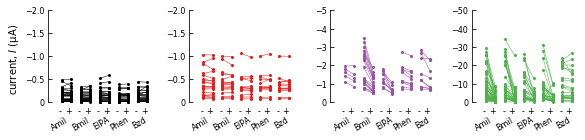

In [89]:
# import matplotlib.pyplot as plt
# import numpy as np

fig = plt.figure(figsize=(12, 1.9)) 

ax1 = plt.subplot(1,4,1)
ax2 = plt.subplot(1,4,2)

ax3 = plt.subplot(1,4,3)
ax4 = plt.subplot(1,4,4)


plot1 = [1,2]
plot2 = [3,4]
plot3 = [5,6]
plot4 = [7,8]
plot5 = [9,10]

#### common parameters
axesText = ''
SizeOfMarker = 2
SizeofLine = 0.5
AxisTickLabelSize =8

#plotting the lines
for i in range(len(df_newInuA["uninjected-NaGluAmil30"])):
    ax1.plot(plot1, [df_newInuA["uninjected-NaGluAmil30"][i], df_newInuA["uninjected+NaGluAmil30"][i]], c='k',marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)# alpha=0.5

for i in range(len(df_newInuA["uninjected-NaGluBmil30"])):
    ax1.plot(plot2, [df_newInuA["uninjected-NaGluBmil30"][i], df_newInuA["uninjected+NaGluBmil30"][i]], c='k',marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["uninjected-NaGluEipa30"])):
    ax1.plot(plot3, [df_newInuA["uninjected-NaGluEipa30"][i], df_newInuA["uninjected+NaGluEipa30"][i]], c='k',marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["uninjected-NaGluPhen30"])):
    ax1.plot(plot4, [df_newInuA["uninjected-NaGluPhen30"][i], df_newInuA["uninjected+NaGluPhen30"][i]], c='k',marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["uninjected-NaGluBzd30"])):
    ax1.plot(plot5, [df_newInuA["uninjected-NaGluBzd30"][i], df_newInuA["uninjected+NaGluBzd30"][i]], c='k',marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

######

# # plotting the lines
for i in range(len(df_newInuA["mg418mg012-NaGluAmil30"])):
    ax2.plot(plot1, [df_newInuA["mg418mg012-NaGluAmil30"][i], df_newInuA["mg418mg012+NaGluAmil30"][i]], c=(0.89, 0.11, 0.1),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["mg418mg012-NaGluBmil30"])):
    ax2.plot(plot2, [df_newInuA["mg418mg012-NaGluBmil30"][i], df_newInuA["mg418mg012+NaGluBmil30"][i]], c=(0.89, 0.11, 0.1),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["mg418mg012-NaGluEipa30"])):
    ax2.plot(plot3, [df_newInuA["mg418mg012-NaGluEipa30"][i], df_newInuA["mg418mg012+NaGluEipa30"][i]], c=(0.89, 0.11, 0.1),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["mg418mg012-NaGluPhen30"])):
    ax2.plot(plot4, [df_newInuA["mg418mg012-NaGluPhen30"][i], df_newInuA["mg418mg012+NaGluPhen30"][i]], c=(0.89, 0.11, 0.1),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["mg418mg012-NaGluBzd30"])):
    ax2.plot(plot5, [df_newInuA["mg418mg012-NaGluBzd30"][i], df_newInuA["mg418mg012+NaGluBzd30"][i]], c=(0.89, 0.11, 0.1),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

######

for i in range(len(df_newInuA["pTL69mg012-NaGluAmil30"])):
    ax3.plot(plot1, [df_newInuA["pTL69mg012-NaGluAmil30"][i], df_newInuA["pTL69mg012+NaGluAmil30"][i]], c=(0.6, 0.31, 0.64),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["pTL69mg012-NaGluBmil30"])):
    ax3.plot(plot2, [df_newInuA["pTL69mg012-NaGluBmil30"][i], df_newInuA["pTL69mg012+NaGluBmil30"][i]], c=(0.6, 0.31, 0.64),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["pTL69mg012-NaGluEipa30"])):
    ax3.plot(plot3, [df_newInuA["pTL69mg012-NaGluEipa30"][i], df_newInuA["pTL69mg012+NaGluEipa30"][i]], c=(0.6, 0.31, 0.64),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["pTL69mg012-NaGluPhen30"])):
    ax3.plot(plot4, [df_newInuA["pTL69mg012-NaGluPhen30"][i], df_newInuA["pTL69mg012+NaGluPhen30"][i]], c=(0.6, 0.31, 0.64),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["pTL69mg012-NaGluBzd30"])):
    ax3.plot(plot5 , [df_newInuA["pTL69mg012-NaGluBzd30"][i], df_newInuA["pTL69mg012+NaGluBzd30"][i]], c=(0.6, 0.31, 0.64),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)
########

  
###########
for i in range(len(df_newInuA["mg419mg012-NaGluAmil30"])):
    ax4.plot(plot1, [df_newInuA["mg419mg012-NaGluAmil30"][i], df_newInuA["mg419mg012+NaGluAmil30"][i]], c=(0.3, 0.69, 0.29),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["mg419mg012-NaGluBmil30"])):
    ax4.plot(plot2, [df_newInuA["mg419mg012-NaGluBmil30"][i], df_newInuA["mg419mg012+NaGluBmil30"][i]], c=(0.3, 0.69, 0.29),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["mg419mg012-NaGluEipa30"])):
    ax4.plot(plot3, [df_newInuA["mg419mg012-NaGluEipa30"][i], df_newInuA["mg419mg012+NaGluEipa30"][i]], c=(0.3, 0.69, 0.29),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["mg419mg012-NaGluPhen30"])):
    ax4.plot(plot4, [df_newInuA["mg419mg012-NaGluPhen30"][i], df_newInuA["mg419mg012+NaGluPhen30"][i]], c=(0.3, 0.69, 0.29),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["mg419mg012-NaGluBzd30"])):
    ax4.plot(plot5, [df_newInuA["mg419mg012-NaGluBzd30"][i], df_newInuA["mg419mg012+NaGluBzd30"][i]], c=(0.3, 0.69, 0.29),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)


labelsAmil = ["Amil", "Bmil","EIPA", "Phen", "Bzd"]


ylimSetM4 = [0,-50]
ylimSetU8 = [0,-5]
ylimSetDT1 = [0,-2]
##### AXIS 1 ####
ax1.set_ylim(ylimSetDT1)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',1))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
# ax1.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='y', which='major', labelsize=AxisTickLabelSize )  
ax1.tick_params(axis='x', which='major', labelsize=AxisTickLabelSize, length=0) 
# ax7.set_title('Ibuoride Analogues',size=12)
# ax1.set_xticklabels(np.unique(IbuAll30['Injection']),rotation=30)
ax1.set_xticks((plot1[0],plot1[1], plot2[0],plot2[1], plot3[0], plot3[1],plot4[0],plot4[1],plot5[0],plot5[1])) 
ax1.spines['bottom'].set_visible(False) 
#a1.xaxis.set_visible(False)
labels = ['-','+','-','+','-','+','-','+','-','+']
ax1.set_xticklabels(labels,  ha='right',)
ax1.text(1.8, 0.44, labelsAmil[0],ha='right',rotation=30,fontsize= AxisLegendSize)
ax1.text(4.,0.44, labelsAmil[1],ha='right',rotation=30,fontsize= AxisLegendSize)
ax1.text(6.2, 0.44, labelsAmil[2],ha='right',rotation=30,fontsize= AxisLegendSize)
ax1.text(8.2, 0.44, labelsAmil[3],ha='right',rotation=30,fontsize= AxisLegendSize)
ax1.text(10.1, 0.44, labelsAmil[4],ha='right',rotation=30,fontsize= AxisLegendSize)
ax1.set_yticks([0,-0.5,-1,-1.5,-2])
plt.draw()      # Note, this line is important
labels = [l.get_text() for l in ax1.get_yticklabels()]
labels[0] = '0'
ax1.set_yticklabels(labels)

# #ax1.set_xlabel('V (mV)',fontsize=14)
# #ax1.set_ylabel('Change in current @-85 mV (I(drug) - I(before)',fontsize=14)
ax1.set_ylabel(axesText)
ax1.set_xlabel(axesText)
ax1.text(-4, -1.5, 'current, $\it{I}$ (µA)',fontsize=10,rotation=90,ha='center')


##### AXIS 2 ####
ax2.set_ylim(ylimSetDT1)
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',1))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
# ax1.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='y', which='major', labelsize=AxisTickLabelSize )  
ax2.tick_params(axis='x', which='major', labelsize=AxisTickLabelSize, length=0)   
# ax7.set_title('Ibuoride Analogues',size=12)
ax2.set_xticks((plot1[0],plot1[1], plot2[0],plot2[1], plot3[0], plot3[1],plot4[0],plot4[1],plot5[0],plot5[1])) 
ax2.spines['bottom'].set_visible(False) 
#ax1.xaxis.set_visible(False)
labels = ['-','+','-','+','-','+','-','+','-','+']
ax2.set_xticklabels(labels,  ha='right',) 
ax2.text(1.8, 0.44, labelsAmil[0],ha='right',rotation=30,fontsize= AxisLegendSize)
ax2.text(4., 0.44, labelsAmil[1],ha='right',rotation=30,fontsize= AxisLegendSize)
ax2.text(6.2, 0.44, labelsAmil[2],ha='right',rotation=30,fontsize= AxisLegendSize)
ax2.text(8.2, 0.44, labelsAmil[3],ha='right',rotation=30,fontsize= AxisLegendSize)
ax2.text(10.1, 0.44, labelsAmil[4],ha='right',rotation=30,fontsize= AxisLegendSize)
ax2.set_yticks([0,-0.5,-1,-1.5,-2])
plt.draw()      # Note, this line is important
labels = [l.get_text() for l in ax2.get_yticklabels()]
labels[0] = '0'
ax2.set_yticklabels(labels)

# #ax1.set_xlabel('V (mV)',fontsize=14)
# #ax1.set_ylabel('Change in current @-85 mV (I(drug) - I(before)',fontsize=14)
ax2.set_ylabel(axesText)
ax2.set_xlabel(axesText)
# ax7.text(-3.7, -0.1, 'Change in current at -85 mV (I(drug) - I(before)',fontsize=14,rotation=90)

   ##### AXIS 3 ####
ax3.set_ylim(ylimSetU8)
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',1))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
# 3ax1.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='y', which='major', labelsize=AxisTickLabelSize )  
ax3.tick_params(axis='x', which='major', labelsize=AxisTickLabelSize, length=0) 
# ax7.set_title('Ibuoride Analogues',size=12)
ax3.set_xticks((plot1[0],plot1[1], plot2[0],plot2[1], plot3[0], plot3[1],plot4[0],plot4[1],plot5[0],plot5[1])) 
ax3.spines['bottom'].set_visible(False) 
#ax1.xaxis.set_visible(False)
labels = ['-','+','-','+','-','+','-','+','-','+']
ax3.set_xticklabels(labels,  ha='right',)
ax3.text(1.8, 1.1, labelsAmil[0],ha='right',rotation=30,fontsize= AxisLegendSize)
ax3.text(4., 1.1, labelsAmil[1],ha='right',rotation=30,fontsize= AxisLegendSize)
ax3.text(6.2, 1.1, labelsAmil[2],ha='right',rotation=30,fontsize= AxisLegendSize)
ax3.text(8.2, 1.1, labelsAmil[3],ha='right',rotation=30,fontsize= AxisLegendSize)
ax3.text(10.1, 1.1, labelsAmil[4],ha='right',rotation=30,fontsize= AxisLegendSize)
# #ax1.set_xlabel('V (mV)',fontsize=14)
# #ax1.set_ylabel('Change in current @-85 mV (I(drug) - I(before)',fontsize=14)
ax3.set_ylabel(axesText)
ax3.set_xlabel(axesText)
# ax7.text(-3.7, -0.1, 'Change in current at -85 mV (I(drug) - I(before)',fontsize=14,rotation=90)

   ##### AXIS 4####
ax4.set_ylim(ylimSetM4)
ax4.spines['right'].set_visible(False)                                  # no spine at the right
ax4.spines['top'].set_visible(False)                                     # no spine at the top
ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax4.spines['bottom'].set_position(('outward',1))  
ax4.spines['top'].set_position(('axes',5)) 
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
# 3ax1.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1   
# ax.tick_params(axis="x", labelsize=18, labelrotation=-60, labelcolor="turquoise")
# ax.tick_params(axis="y", labelsize=12, labelrotation=20, labelcolor="orange")
ax4.tick_params(axis='y', which='major', labelsize=AxisTickLabelSize )  
ax4.tick_params(axis='x', which='major', labelsize=AxisTickLabelSize, length=0)  

ax4.set_xticks((plot1[0],plot1[1], plot2[0],plot2[1], plot3[0], plot3[1],plot4[0],plot4[1],plot5[0],plot5[1])) 
ax4.spines['bottom'].set_visible(False) 
#ax1.xaxis.set_visible(False)
labels = ['-','+','-','+','-','+','-','+','-','+']
ax4.set_xticklabels(labels,  ha='right')
ax4.text(1.8, 11, labelsAmil[0],ha='right',rotation=30,fontsize= AxisLegendSize)
ax4.text(4., 11, labelsAmil[1],ha='right',rotation=30,fontsize= AxisLegendSize)
ax4.text(6.2, 11, labelsAmil[2],ha='right',rotation=30,fontsize= AxisLegendSize)
ax4.text(8.2, 11, labelsAmil[3],ha='right',rotation=30,fontsize= AxisLegendSize)
ax4.text(10.1, 11, labelsAmil[4],ha='right',rotation=30,fontsize= AxisLegendSize)
#ax4.set_xticklabels(labelsAmil,rotation=30)


ax4.set_ylabel(axesText)
ax4.set_xlabel(axesText)

    
plt.gcf().subplots_adjust(bottom=0.21, left=0.3,right=None, top=None,hspace=1.5, wspace=0.5)     
    
# plt.show()

plt.savefig(filedirManuscript+"Fig2-amilorideAnalogs-pairedPoints"+'.pdf')
#plt.savefig(filedirManuscript+"Fig2-amilorideAnalogs-pairedPoints"+'.eps')
#plt.savefig(filedirManuscript+"Fig2-amilorideAnalogs-pairedPoints"+'.jpg')

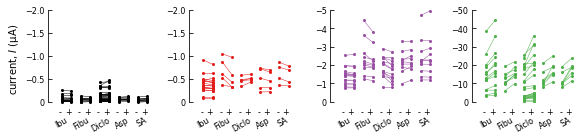

In [90]:
# import matplotlib.pyplot as plt
# import numpy as np

fig = plt.figure(figsize=(12, 1.9)) 

ax1 = plt.subplot(1,4,1)
ax2 = plt.subplot(1,4,2)

ax3 = plt.subplot(1,4,3)
ax4 = plt.subplot(1,4,4)


plot1 = [1,2]
plot2 = [3,4]
plot3 = [5,6]
plot4 = [7,8]
plot5 = [9,10]

SizeOfMarker = 2

#plotting the lines
for i in range(len(df_newInuA["uninjected-NaGluIbu30"])):
    ax1.plot(plot1, [df_newInuA["uninjected-NaGluIbu30"][i], df_newInuA["uninjected+NaGluIbu30"][i]], c='k',marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["uninjected-NaGluFibu30"])):
    ax1.plot(plot2, [df_newInuA["uninjected-NaGluFibu30"][i], df_newInuA["uninjected+NaGluFibu30"][i]], c='k',marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["uninjected-NaGluDiclo30"])):
    ax1.plot(plot3, [df_newInuA["uninjected-NaGluDiclo30"][i], df_newInuA["uninjected+NaGluDiclo30"][i]], c='k',marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["uninjected-NaGluAsp30"])):
    ax1.plot(plot4, [df_newInuA["uninjected-NaGluAsp30"][i], df_newInuA["uninjected+NaGluAsp30"][i]], c='k',marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["uninjected-NaGluSA30"])):
    ax1.plot(plot5, [df_newInuA["uninjected-NaGluSA30"][i], df_newInuA["uninjected+NaGluSA30"][i]], c='k',marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

######

# # plotting the lines
for i in range(len(df_newInuA["mg418mg012-NaGluIbu30"])):
    ax2.plot(plot1, [df_newInuA["mg418mg012-NaGluIbu30"][i], df_newInuA["mg418mg012+NaGluIbu30"][i]], c=(0.89, 0.11, 0.1),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["mg418mg012-NaGluFibu30"])):
    ax2.plot(plot2, [df_newInuA["mg418mg012-NaGluFibu30"][i], df_newInuA["mg418mg012+NaGluFibu30"][i]], c=(0.89, 0.11, 0.1),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["mg418mg012-NaGluDiclo30"])):
    ax2.plot(plot3, [df_newInuA["mg418mg012-NaGluDiclo30"][i], df_newInuA["mg418mg012+NaGluDiclo30"][i]], c=(0.89, 0.11, 0.1),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["mg418mg012-NaGluAsp30"])):
    ax2.plot(plot4, [df_newInuA["mg418mg012-NaGluAsp30"][i], df_newInuA["mg418mg012+NaGluAsp30"][i]], c=(0.89, 0.11, 0.1),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["mg418mg012-NaGluSA30"])):
    ax2.plot(plot5, [df_newInuA["mg418mg012-NaGluSA30"][i], df_newInuA["mg418mg012+NaGluSA30"][i]], c=(0.89, 0.11, 0.1),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

######

for i in range(len(df_newInuA["pTL69mg012-NaGluIbu30"])):
    ax3.plot(plot1, [df_newInuA["pTL69mg012-NaGluIbu30"][i], df_newInuA["pTL69mg012+NaGluIbu30"][i]], c=(0.6, 0.31, 0.64),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["pTL69mg012-NaGluFibu30"])):
    ax3.plot(plot2, [df_newInuA["pTL69mg012-NaGluFibu30"][i], df_newInuA["pTL69mg012+NaGluFibu30"][i]], c=(0.6, 0.31, 0.64),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["pTL69mg012-NaGluDiclo30"])):
    ax3.plot(plot3, [df_newInuA["pTL69mg012-NaGluDiclo30"][i], df_newInuA["pTL69mg012+NaGluDiclo30"][i]], c=(0.6, 0.31, 0.64),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["pTL69mg012-NaGluAsp30"])):
    ax3.plot(plot4, [df_newInuA["pTL69mg012-NaGluAsp30"][i], df_newInuA["pTL69mg012+NaGluAsp30"][i]], c=(0.6, 0.31, 0.64),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["pTL69mg012-NaGluSA30"])):
    ax3.plot(plot5 , [df_newInuA["pTL69mg012-NaGluSA30"][i], df_newInuA["pTL69mg012+NaGluSA30"][i]], c=(0.6, 0.31, 0.64),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)
########

  
###########
for i in range(len(df_newInuA["mg419mg012-NaGluIbu30"])):
    ax4.plot(plot1, [df_newInuA["mg419mg012-NaGluIbu30"][i], df_newInuA["mg419mg012+NaGluIbu30"][i]], c=(0.3, 0.69, 0.29),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["mg419mg012-NaGluFibu30"])):
    ax4.plot(plot2, [df_newInuA["mg419mg012-NaGluFibu30"][i], df_newInuA["mg419mg012+NaGluFibu30"][i]], c=(0.3, 0.69, 0.29),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["mg419mg012-NaGluDiclo30"])):
    ax4.plot(plot3, [df_newInuA["mg419mg012-NaGluDiclo30"][i], df_newInuA["mg419mg012+NaGluDiclo30"][i]], c=(0.3, 0.69, 0.29),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["mg419mg012-NaGluAsp30"])):
    ax4.plot(plot4, [df_newInuA["mg419mg012-NaGluAsp30"][i], df_newInuA["mg419mg012+NaGluAsp30"][i]], c=(0.3, 0.69, 0.29),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["mg419mg012-NaGluSA30"])):
    ax4.plot(plot5, [df_newInuA["mg419mg012-NaGluSA30"][i], df_newInuA["mg419mg012+NaGluSA30"][i]], c=(0.3, 0.69, 0.29),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)


labelsIbu = ["Ibu", "Fibu","Diclo", "Asp", "SA"]

ylimSetM4 = [0,-50]
ylimSetU8 = [0,-5]
ylimSetDT1 = [0,-2]
##### AXIS 1 ####
ax1.set_ylim(ylimSetDT1)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',2))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
# ax1.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='y', which='major', labelsize=AxisTickLabelSize )  
ax1.tick_params(axis='x', which='major', labelsize=AxisTickLabelSize, length=0) 
# ax7.set_title('Ibuoride Analogues',size=12)
# ax1.set_xticklabels(np.unique(IbuAll30['Injection']),rotation=30)
ax1.set_xticks((plot1[0],plot1[1], plot2[0],plot2[1], plot3[0], plot3[1],plot4[0],plot4[1],plot5[0],plot5[1])) 
ax1.spines['bottom'].set_visible(False) 
#a1.xaxis.set_visible(False)
labels = ['-','+','-','+','-','+','-','+','-','+']
ax1.set_xticklabels(labels,  ha='right',)
ax1.text(1.8, 0.44, labelsIbu[0],ha='right',rotation=30,fontsize= AxisLegendSize)
ax1.text(4.,0.44, labelsIbu[1],ha='right',rotation=30,fontsize= AxisLegendSize)
ax1.text(6.2, 0.44, labelsIbu[2],ha='right',rotation=30,fontsize= AxisLegendSize)
ax1.text(8.2, 0.44, labelsIbu[3],ha='right',rotation=30,fontsize= AxisLegendSize)
ax1.text(10.1, 0.44, labelsIbu[4],ha='right',rotation=30,fontsize= AxisLegendSize)
ax1.set_yticks([0,-0.5,-1,-1.5,-2])
plt.draw()      # Note, this line is important
labels = [l.get_text() for l in ax1.get_yticklabels()]
labels[0] = '0'
ax1.set_yticklabels(labels)

# #ax1.set_xlabel('V (mV)',fontsize=14)
# #ax1.set_ylabel('Change in current @-85 mV (I(drug) - I(before)',fontsize=14)
ax1.set_ylabel(axesText)
ax1.set_xlabel(axesText)
ax1.text(-4, -1.5, 'current, $\it{I}$ (µA)',fontsize=10,rotation=90,ha='center')


##### AXIS 2 ####
ax2.set_ylim(ylimSetDT1)
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',2))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
# ax1.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='y', which='major', labelsize=AxisTickLabelSize )  
ax2.tick_params(axis='x', which='major', labelsize=AxisTickLabelSize, length=0)   
# ax7.set_title('Ibuoride Analogues',size=12)
ax2.set_xticks((plot1[0],plot1[1], plot2[0],plot2[1], plot3[0], plot3[1],plot4[0],plot4[1],plot5[0],plot5[1])) 
ax2.spines['bottom'].set_visible(False) 
#ax1.xaxis.set_visible(False)
labels = ['-','+','-','+','-','+','-','+','-','+']
ax2.set_xticklabels(labels,  ha='right',) 
ax2.text(1.8,0.44, labelsIbu[0],ha='right',rotation=30,fontsize= AxisLegendSize)
ax2.text(4.,0.44, labelsIbu[1],ha='right',rotation=30,fontsize= AxisLegendSize)
ax2.text(6.2, 0.44, labelsIbu[2],ha='right',rotation=30,fontsize= AxisLegendSize)
ax2.text(8.2, 0.44, labelsIbu[3],ha='right',rotation=30,fontsize= AxisLegendSize)
ax2.text(10.1, 0.44, labelsIbu[4],ha='right',rotation=30,fontsize= AxisLegendSize)
ax2.set_yticks([0,-0.5,-1,-1.5,-2])
plt.draw()      # Note, this line is important
labels = [l.get_text() for l in ax2.get_yticklabels()]
labels[0] = '0'
ax2.set_yticklabels(labels)

# #ax1.set_xlabel('V (mV)',fontsize=14)
# #ax1.set_ylabel('Change in current @-85 mV (I(drug) - I(before)',fontsize=14)
ax2.set_ylabel(axesText)
ax2.set_xlabel(axesText)
# ax7.text(-3.7, -0.1, 'Change in current at -85 mV (I(drug) - I(before)',fontsize=14,rotation=90)

   ##### AXIS 3 ####
ax3.set_ylim(ylimSetU8)
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',2))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
# 3ax1.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='y', which='major', labelsize=AxisTickLabelSize )  
ax3.tick_params(axis='x', which='major', labelsize=AxisTickLabelSize, length=0) 
# ax7.set_title('Ibuoride Analogues',size=12)
ax3.set_xticks((plot1[0],plot1[1], plot2[0],plot2[1], plot3[0], plot3[1],plot4[0],plot4[1],plot5[0],plot5[1])) 
ax3.spines['bottom'].set_visible(False) 
#ax1.xaxis.set_visible(False)
labels = ['-','+','-','+','-','+','-','+','-','+']
ax3.set_xticklabels(labels,  ha='right',)
ax3.text(1.8, 1.1, labelsIbu[0],ha='right',rotation=30,fontsize= AxisLegendSize)
ax3.text(4., 1.1, labelsIbu[1],ha='right',rotation=30,fontsize= AxisLegendSize)
ax3.text(6.2, 1.1, labelsIbu[2],ha='right',rotation=30,fontsize= AxisLegendSize)
ax3.text(8.2, 1.1, labelsIbu[3],ha='right',rotation=30,fontsize= AxisLegendSize)
ax3.text(10.1, 1.1, labelsIbu[4],ha='right',rotation=30,fontsize= AxisLegendSize)
# #ax1.set_xlabel('V (mV)',fontsize=14)
# #ax1.set_ylabel('Change in current @-85 mV (I(drug) - I(before)',fontsize=14)
ax3.set_ylabel(axesText)
ax3.set_xlabel(axesText)
# ax7.text(-3.7, -0.1, 'Change in current at -85 mV (I(drug) - I(before)',fontsize=14,rotation=90)

   ##### AXIS 4####
ax4.set_ylim(ylimSetM4)
ax4.spines['right'].set_visible(False)                                  # no spine at the right
ax4.spines['top'].set_visible(False)                                     # no spine at the top
ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax4.spines['bottom'].set_position(('outward',2))  
ax4.spines['top'].set_position(('axes',5)) 
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
# 3ax1.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1   
# ax.tick_params(axis="x", labelsize=18, labelrotation=-60, labelcolor="turquoise")
# ax.tick_params(axis="y", labelsize=12, labelrotation=20, labelcolor="orange")
ax4.tick_params(axis='y', which='major', labelsize=AxisTickLabelSize )  
ax4.tick_params(axis='x', which='major', labelsize=AxisTickLabelSize, length=0)  

ax4.set_xticks((plot1[0],plot1[1], plot2[0],plot2[1], plot3[0], plot3[1],plot4[0],plot4[1],plot5[0],plot5[1])) 
ax4.spines['bottom'].set_visible(False) 
#ax1.xaxis.set_visible(False)
labels = ['-','+','-','+','-','+','-','+','-','+']
ax4.set_xticklabels(labels,  ha='right')
ax4.text(1.8, 11, labelsIbu[0],ha='right',rotation=30,fontsize= AxisLegendSize)
ax4.text(4., 11, labelsIbu[1],ha='right',rotation=30,fontsize= AxisLegendSize)
ax4.text(6.2, 11, labelsIbu[2],ha='right',rotation=30,fontsize= AxisLegendSize)
ax4.text(8.2, 11, labelsIbu[3],ha='right',rotation=30,fontsize= AxisLegendSize)
ax4.text(10.1, 11, labelsIbu[4],ha='right',rotation=30,fontsize= AxisLegendSize)
#ax4.set_xticklabels(labelsIbu,rotation=30)


ax4.set_ylabel(axesText)
ax4.set_xlabel(axesText)

    

plt.gcf().subplots_adjust(bottom=0.21, left=0.3,right=None, top=None,hspace=1.5, wspace=0.5)     
    
# plt.show()

plt.savefig(filedirManuscript+"Fig2-NSAIDs-pairedPoints"+'.pdf')
#plt.savefig(filedirManuscript+"Fig2-IbuorideAnalogs-pairedPoints"+'.eps')
#plt.savefig(filedirManuscript+"Fig2-IbuorideAnalogs-pairedPoints"+'.jpg')

### test plot paired data

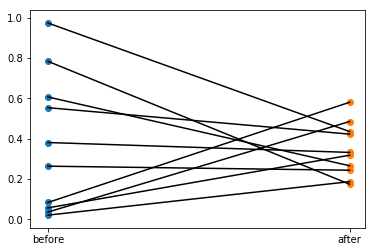

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# your input data:
befores = np.random.rand(10)
afters = np.random.rand(10)

# plotting the points
plt.scatter(np.zeros(len(befores)), befores)
plt.scatter(np.ones(len(afters)), afters)

# plotting the lines
for i in range(len(befores)):
    plt.plot( [0,1], [befores[i], afters[i]], c='k')

plt.xticks([0,1], ['before', 'after'])

plt.show()

# supplementary Figure: higher concentrations

In [92]:
Amil100 = df[(df.Injection.isin(["mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluAmil100"]))]
Ibu100 = df[(df.Injection.isin(["mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluIbu100"]))]
Amil300 = df[(df.Injection.isin(["mg418mg012","uninjected","mg012","mg418"])) & (df.TestSol.isin(["NaGluAmil300"]))]
Ibu300 = df[(df.Injection.isin(["mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluIbu300"]))]



Img418Amil100 = Amil100.loc[Amil100['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Amil100.columns = ['D-Amil']


Img418Ibu100 = Ibu100.loc[Ibu100['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Ibu100.columns = ['D-Ibu']

IUninjAmil100 = Amil100.loc[Amil100['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
IUninjAmil100.columns = ['Uij-Amil']


IUninjIbu100 = Ibu100.loc[Ibu100['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
IUninjIbu100.columns = ['Uij-Ibu']


### 300 
Img418Amil300 = Amil300.loc[Amil300['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Amil300.columns = ['D-Amil300']

Img418aloneAmil300 = Amil300.loc[Amil300['Injection'] == 'mg418',['DELTA']] #returns a data frame 
Img418aloneAmil300.columns = ['Dalone-Amil300']

Img012aloneAmil300 = Amil300.loc[Amil300['Injection'] == 'mg012',['DELTA']] #returns a data frame 
Img012aloneAmil300.columns = ['M2-Amil300']

Img418Ibu300 = Ibu300.loc[Ibu300['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Ibu300.columns = ['D-Ibu300']

IUninjAmil300 = Amil300.loc[Amil300['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
IUninjAmil300.columns = ['Uij-Amil300']


IUninjIbu300 = Ibu300.loc[Ibu300['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
IUninjIbu300.columns = ['Uij-Ibu300']
                       


### concatenate data to plot all amil including M2 alone

In [93]:
I100Concat = pd.concat([Img418Amil100.reset_index(drop=True),IUninjAmil100.reset_index(drop=True),Img418Amil300.reset_index(drop=True),IUninjAmil300.reset_index(drop=True),Img418aloneAmil300.reset_index(drop=True),Img012aloneAmil300.reset_index(drop=True),],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doin
I100ConcatuA = I100Concat.astype(float)*1000000
                                                          
#shared_controltest = dabest.load(I100ConcatuA, idx=(("Uij-Amil", "D-Amil",),("Uij-Bmil", "D-Bmil",), ("Uij-Ibu", "D-Ibu")))
multi_2group100 = dabest.load(I100ConcatuA, idx=(("Uij-Amil", "D-Amil",), ("Uij-Amil300","M2-Amil300","Dalone-Amil300", "D-Amil300",)))



In [94]:
multi_2group100.mean_diff


DABEST v0.2.4
             
Good afternoon!
The current time is Thu Dec 17 13:36:06 2020.

The unpaired mean difference between Uij-Amil and D-Amil is 0.0201 [95%CI -0.0369, 0.0696].
The two-sided p-value of the Mann-Whitney test is 0.35.

The unpaired mean difference between Uij-Amil300 and M2-Amil300 is -0.0067 [95%CI -0.017, 0.00467].
The two-sided p-value of the Mann-Whitney test is 0.19.

The unpaired mean difference between Uij-Amil300 and Dalone-Amil300 is 0.0288 [95%CI 0.00792, 0.0602].
The two-sided p-value of the Mann-Whitney test is 0.0528.

The unpaired mean difference between Uij-Amil300 and D-Amil300 is 0.0623 [95%CI 0.0392, 0.094].
The two-sided p-value of the Mann-Whitney test is 1.32e-06.

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.

To get the results of all valid statistical tests, use `.me

### figure Amil 100 and 300 including M2 alone

In [95]:

colorsEST100 = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.60, 0.62, 0.62),(0.89,0.54,0.56),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29)]


<Figure size 252x216 with 0 Axes>

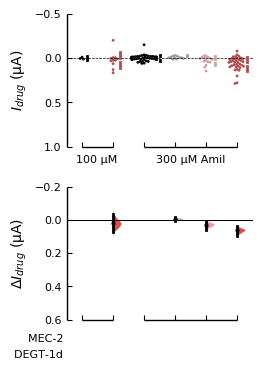

In [108]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
plt.figure(figsize=(3.5, 3)) 
fig1= multi_2group100.mean_diff.plot(swarm_ylim=(1,-0.5), contrast_ylim=(0.6,-0.2), custom_palette=colorsEST100,fig_size=(3.1, 4.5),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='Δ$\it{I}$$_{drug}$ (µA)',
                                    swarm_label='$\it{I}$$_{drug}$ (µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))



fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linestyle='--',linewidth=0.5)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

labels = []#'0','100','0','100','0','100','0','100' 
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right')

#labels2 = ['uninj','DEGT-1d','uninj','MEC-2 alone','DEGT-1d','DEGT-1d alone', ]
labels2 = ['',]
fig1.axes[1].set_xticklabels(labels2, ha='right',fontsize= AxisLegendSize)
fig1.axes[1].text(-0.5, 0.73, 'MEC-2 ',ha='right',fontsize= AxisLegendSize)
fig1.axes[1].text(-0.5, 0.83, 'DEGT-1d ',ha='right',fontsize= AxisLegendSize)
fig1.axes[0].text(-0.2, 1.18, '100 µM ',fontsize= AxisLegendSize)
fig1.axes[0].text(2.4, 1.18, '300 µM Amil',fontsize= AxisLegendSize)
fig1.axes[0].get_yaxis().set_tick_params(direction='in')
fig1.axes[1].get_yaxis().set_tick_params(direction='in')
fig1.axes[0].get_xaxis().set_tick_params(direction='in')
fig1.axes[1].get_xaxis().set_tick_params(direction='in')

plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=1.5, wspace=0.2) 
plt.savefig(filedir+"Fig3-Suppl-Amil100and300"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig3-Suppl-Amil100and300"+'.pdf')




## paired data higher amiloride

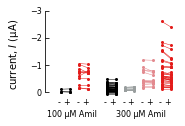

In [97]:
fig = plt.figure(figsize=(2.8, 1.8)) 


ax1 = plt.subplot(1,1,1)

plot1 = [1,2]
plot2 = [3,4]
plot3 = [6,7]
plot4 = [8,9]
plot5 = [10,11]
plot6 = [12,13]
# plot7 = [14,15]

SizeOfMarker = 2
SizeofLine = 0.5
AxisTickLabelSize =8

for i in range(len(df_newInuA["uninjected-NaGluAmil100"])):
    ax1.plot(plot1, [df_newInuA["uninjected-NaGluAmil100"][i], df_newInuA["uninjected+NaGluAmil100"][i]], c='k',marker = 'o',markersize=SizeOfMarker,linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["mg418mg012-NaGluAmil100"])):
    ax1.plot(plot2, [df_newInuA["mg418mg012-NaGluAmil100"][i], df_newInuA["mg418mg012+NaGluAmil100"][i]], c=(0.89, 0.11,0.10),marker = 'o',markersize=SizeOfMarker,linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["uninjected-NaGluAmil300"])):
    ax1.plot(plot3, [df_newInuA["uninjected-NaGluAmil300"][i], df_newInuA["uninjected+NaGluAmil300"][i]], c='k',marker = 'o',markersize=SizeOfMarker,linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["mg012-NaGluAmil300"])):
    ax1.plot(plot4, [df_newInuA["mg012-NaGluAmil300"][i], df_newInuA["mg012+NaGluAmil300"][i]], c=(0.60, 0.62, 0.62),marker = 'o',markersize=SizeOfMarker,linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["mg418-NaGluAmil300"])):
    ax1.plot(plot5, [df_newInuA["mg418-NaGluAmil300"][i], df_newInuA["mg418+NaGluAmil300"][i]], c=(0.89,0.54,0.56),marker = 'o',markersize=SizeOfMarker,linewidth=SizeofLine,clip_on=False)
    
for i in range(len(df_newInuA["mg418mg012-NaGluAmil300"])):
    ax1.plot(plot6, [df_newInuA["mg418mg012-NaGluAmil300"][i], df_newInuA["mg418mg012+NaGluAmil300"][i]], c=(0.89, 0.11,0.10),marker = 'o',markersize=SizeOfMarker,linewidth=SizeofLine,clip_on=False)



# for i in range(len(df_newInuA["pTL69mg012-NaGluAmil300"])):
#     ax1.plot(plot7, [df_newInuA["pTL69mg012-NaGluAmil300"][i], df_newInuA["pTL69mg012+NaGluAmil300"][i]], c=(0.60, 0.31,0.64),marker = 'o',markersize=SizeOfMarker,linewidth=SizeofLine)
 



labelsAmil = ["uninj", "DEGT-1d","EIPA", "Phen", "Bzd",""]

ylimSetM4 = [0,-50]
ylimSetU8 = [0,-5]
ylimSetDT1 = [0,-3]
# ylimSetM4 = [0.5,-50]
# ylimSetU8 = [0.1,-5]
# ylimSetDT1 = [1,-3]
##### AXIS 1 ####
ax1.set_ylim(ylimSetDT1)

# test = [ax1,ax2,ax3,ax4]
# for element in test:
#     element.spines['right'].set_visible(False) 
    
    
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',2))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
# ax1.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='y', which='major', labelsize=AxisTickLabelSize )  
ax1.tick_params(axis='x', which='major', labelsize=AxisTickLabelSize, length=0)  #0 set tick length to 0 and thus removes it 
# ax7.set_title('Amiloride Analogues',size=12)
# ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax1.set_xticks((plot1[0],plot1[1], plot2[0],plot2[1], plot3[0], plot3[1],plot4[0],plot4[1],plot5[0],plot5[1],plot6[0],plot6[1])) 
ax1.spines['bottom'].set_visible(False) 
#ax1.xaxis.set_visible(False)
labels = ['-','+','-','+','-','+','-','+','-','+','-','+',]
ax1.set_xticklabels(labels,  ha='right',)
# ax1.set_yticks([0,-0.5,-1,-1.5,-2])
# #ax1.set_xlabel('V (mV)',fontsize=14)
# #ax1.set_ylabel('Change in current @-85 mV (I(drug) - I(before)',fontsize=14)
ax1.set_ylabel(axesText)
ax1.set_xlabel(axesText)

ax1.text(-0.5, 0.9, '100 µM Amil',fontsize= AxisLegendSize)
ax1.text(7., 0.9, '300 µM Amil',fontsize= AxisLegendSize)

ax1.text(-4.1, -2.35, 'current, $\it{I}$ (µA)',fontsize=AxisLabelSize,rotation=90,ha='center')


  

plt.gcf().subplots_adjust(bottom=0.25, left=0.3,right=None, top=None,hspace=1.5, wspace=0.5)     
    
# plt.show()

plt.savefig(filedirManuscript+"Fig2-Suppl-Paired-Amil"+'.pdf')
#plt.savefig(filedirManuscript+"Fig2-IbuorideAnalogs-pairedPoints"+'.eps')
#plt.savefig(filedirManuscript+"Fig2-IbuorideAnalogs-pairedPoints"+'.jpg')


# paired higher Ibuprofen

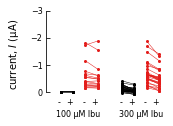

In [106]:
fig = plt.figure(figsize=(2.5, 1.8))  


ax1 = plt.subplot(1,1,1)

plot1 = [1,2]
plot2 = [3,4]
plot3 = [6,7]
plot4 = [8,9]
# plot5 = [9,10]

SizeOfMarker = 2

for i in range(len(df_newInuA["uninjected-NaGluIbu100"])):
    ax1.plot(plot1, [df_newInuA["uninjected-NaGluIbu100"][i], df_newInuA["uninjected+NaGluIbu100"][i]], c='k',marker = 'o',markersize=SizeOfMarker,linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["mg418mg012-NaGluIbu100"])):
    ax1.plot(plot2, [df_newInuA["mg418mg012-NaGluIbu100"][i], df_newInuA["mg418mg012+NaGluIbu100"][i]], c=(0.89, 0.11,0.10),marker = 'o',markersize=SizeOfMarker,linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["uninjected-NaGluIbu300"])):
    ax1.plot(plot3, [df_newInuA["uninjected-NaGluIbu300"][i], df_newInuA["uninjected+NaGluIbu300"][i]], c='k',marker = 'o',markersize=SizeOfMarker,linewidth=SizeofLine,clip_on=False)

for i in range(len(df_newInuA["mg418mg012-NaGluIbu300"])):
    ax1.plot(plot4, [df_newInuA["mg418mg012-NaGluIbu300"][i], df_newInuA["mg418mg012+NaGluIbu300"][i]], c=(0.89, 0.11,0.10),marker = 'o',markersize=SizeOfMarker,linewidth=SizeofLine,clip_on=False)



######


labelsIbu = ["Ibu", "Bmil","EIPA", "Phen", "Bzd",""]

ylimSetM4 = [0.,-50]
ylimSetU8 = [0.,-5]
ylimSetDT1 = [0,-3]
##### AXIS 1 ####
ax1.set_ylim(ylimSetDT1)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',2))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
# ax1.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='y', which='major', labelsize=AxisTickLabelSize )  
ax1.tick_params(axis='x', which='major', labelsize=AxisTickLabelSize, length=0)  #0 set tick length to 0 and thus removes it 
# ax7.set_title('Amiloride Analogues',size=12)
# ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax1.set_xticks((plot1[0],plot1[1], plot2[0],plot2[1], plot3[0], plot3[1],plot4[0],plot4[1])) 

ax1.spines['bottom'].set_visible(False) 
#ax1.xaxis.set_visible(False)
#ax1.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
labels = ['-','+','-','+','-','+','-','+',]
ax1.set_xticklabels(labels,  ha='right',)
#rotation=30,
# ax1.set_yticks([0,-0.5,-1,-1.5,-2])
# #ax1.set_xlabel('V (mV)',fontsize=14)
# #ax1.set_ylabel('Change in current @-85 mV (I(drug) - I(before)',fontsize=14)
ax1.set_ylabel(axesText)
ax1.set_xlabel(axesText)
ax1.text(0.6, 0.9, '100 µM Ibu',fontsize= AxisLegendSize)
ax1.text(5.7, 0.9, '300 µM Ibu',fontsize= AxisLegendSize)

ax1.text(-2.8, -2.35, 'current, $\it{I}$ (µA)',fontsize=AxisLabelSize,rotation=90,ha='center')

plt.gcf().subplots_adjust(bottom=0.25, left=0.3, right=None, top=None,hspace=None, wspace=0.5)     
        
# plt.show()

plt.savefig(filedirManuscript+"Fig2-Suppl-paired-Ibu"+'.pdf')
#plt.savefig(filedirManuscript+"Fig2-IbuorideAnalogs-pairedPoints"+'.eps')
#plt.savefig(filedirManuscript+"Fig2-IbuorideAnalogs-pairedPoints"+'.jpg')


### concatenate data Ibu higer concentrations

In [99]:
#concatenateData
I300Concat = pd.concat([IUninjIbu100.reset_index(drop=True),Img418Ibu100.reset_index(drop=True),IUninjIbu300.reset_index(drop=True),Img418Ibu300.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doin
I300ConcatuA = I300Concat.astype(float)*3000000
                                                         

multi_2group300 = dabest.load(I300ConcatuA, idx=(("Uij-Ibu","D-Ibu",), ("Uij-Ibu300", "D-Ibu300")))




In [100]:
multi_2group300.mean_diff

DABEST v0.2.4
             
Good afternoon!
The current time is Thu Dec 17 13:36:14 2020.

The unpaired mean difference between Uij-Ibu and D-Ibu is 0.19 [95%CI 0.0508, 0.347].
The two-sided p-value of the Mann-Whitney test is 0.0229.

The unpaired mean difference between Uij-Ibu300 and D-Ibu300 is 0.322 [95%CI 0.214, 0.466].
The two-sided p-value of the Mann-Whitney test is 2.48e-06.

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

In [101]:
colorsESTIbuhigher= [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29)]

<Figure size 252x216 with 0 Axes>

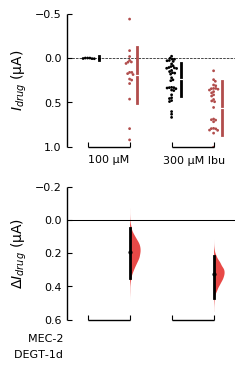

In [104]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
plt.figure(figsize=(3.5, 3)) 
fig1= multi_2group300.mean_diff.plot(swarm_ylim=(1,-0.5), contrast_ylim=(0.6,-0.2), custom_palette=colorsESTIbuhigher,fig_size=(2.8, 4.5),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='Δ$\it{I}$$_{drug}$ (µA)',
                                    swarm_label='$\it{I}$$_{drug}$ (µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))  

fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000',linestyle='--',linewidth=0.5)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

labels = []#'0','100','0','100','0','100','0','100' 
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right',fontsize= AxisLegendSize)

#labels2 = ['uninj','DEGT-1d','uninj','DEGT-1d','DEGT-1d alone', 'MEC-2 alone',]
labels2 = ['',]
fig1.axes[1].set_xticklabels(labels2, ha='right',fontsize= AxisLegendSize)
fig1.axes[1].text(-0.5, 0.73, 'MEC-2 ',ha='right',fontsize= AxisLegendSize)
fig1.axes[1].text(-0.5, 0.83, 'DEGT-1d ',ha='right',fontsize= AxisLegendSize)
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right',fontsize= AxisLegendSize)
fig1.axes[0].text(-0.0, 1.18, '100 µM ',fontsize= AxisLegendSize)
fig1.axes[0].text(1.8, 1.19, '300 µM Ibu',fontsize= AxisLegendSize)
fig1.axes[0].get_yaxis().set_tick_params(direction='in')
fig1.axes[1].get_yaxis().set_tick_params(direction='in')
fig1.axes[0].get_xaxis().set_tick_params(direction='in')
fig1.axes[1].get_xaxis().set_tick_params(direction='in')

plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=1.5, wspace=0.2) 
plt.savefig(filedir+"Fig3-Suppl-Ibu100and300"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig3-Suppl-Ibu100and300"+'.pdf')




# New Gutter